In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import warnings
warnings.filterwarnings('ignore')

# 1.0 Receipts data set

In [2]:
Receipts = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\IBM Datasets\\receipts.csv")
Receipts.head()

ID transaction_date transaction_time  sales_outlet_id  staff_id  \
0   1       27/04/2022         09:53:55                8        42   
1   1       27/04/2022         09:53:55                8        42   
2   2       27/04/2022         08:00:34                8        42   
3   3       27/04/2022         09:04:58                8        42   
4   4       27/04/2022         08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
0            0            0      1             0          38         2   
1            0            0      1             0          84         1   
2            0            0      2             0          51         2   
3            0            1      3             0          33         1   
4         8232            1      4             0          27         1   

   line_item_amount  unit_price  promo_item_y/n  
0               7.5        3.75               0  
1               0.8        0.80               0  
2               6.0        3.00               0  
3               3.5        3.50               0  
4               3.5        3.50               0

## 1.1. EDA

In [3]:
Receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105722 entries, 0 to 105721
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                105722 non-null  int64  
 1   transaction_date  105722 non-null  object 
 2   transaction_time  105722 non-null  object 
 3   sales_outlet_id   105722 non-null  int64  
 4   staff_id          105722 non-null  int64  
 5   customer_id       105722 non-null  int64  
 6   instore_y/n       105722 non-null  int64  
 7   order             105722 non-null  int64  
 8   line_item_id      105722 non-null  int64  
 9   product_id        105722 non-null  int64  
 10  quantity          105722 non-null  int64  
 11  line_item_amount  105722 non-null  float64
 12  unit_price        105722 non-null  float64
 13  promo_item_y/n    105722 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.3+ MB


In [4]:
# Convert 'transaction_time' to datetime format
Receipts['transaction_time'] = pd.to_datetime(Receipts['transaction_time'], format='%H:%M:%S')

# Extract the hour and create a new column 'hour'
Receipts['Hours'] = Receipts['transaction_time'].dt.hour

In [5]:
# Count duplicates
duplicate_count = Receipts.duplicated().sum()

# Print one duplicate entry
if duplicate_count > 0:
    duplicate_entry = Receipts[Receipts.duplicated()].head(1)
    print(f"Duplicate Count: {duplicate_count}")
else:
    print("No duplicates found.")

Duplicate Count: 709


In [6]:
# Find and print the row numbers of the first instance and its duplicate
duplicates = Receipts[Receipts.duplicated(keep=False)]

if not duplicates.empty:
    first_instance_row = duplicates.index[0]
    duplicate_row = duplicates.index[1]
    
    print(f"Row numbers of the first instance and its duplicate:")
    print(f"First Instance Row Number: {first_instance_row}")
    print(f"Duplicate Row Number: {duplicate_row}")
else:
    print("No duplicates found.")

Row numbers of the first instance and its duplicate:
First Instance Row Number: 138
Duplicate Row Number: 139


In [7]:
rows_138_139 = Receipts.loc[[138, 139]]

# Display the result similar to .head()
print("Rows with indices 138 and 139:")
print(rows_138_139)

Rows with indices 138 and 139:
      ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
138  117       27/04/2022 1900-01-01 09:06:24                8        45   
139  117       27/04/2022 1900-01-01 09:06:24                8        45   

     customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
138            0            0    117             0          71         1   
139            0            0    117             0          71         1   

     line_item_amount  unit_price  promo_item_y/n  Hours  
138              3.75        3.75               0      9  
139              3.75        3.75               0      9  


In [8]:
# Drop duplicates and reset indexes
Receipts = Receipts.drop_duplicates(keep='first').reset_index(drop=True)

In [9]:
Receipts.shape

(105013, 15)

In [10]:
# Confirming duplicates removal
rows_138_139 = Receipts.loc[[138, 139]]

# Display the result similar to .head()
print("Rows with indices 138 and 139:")
print(rows_138_139)

Rows with indices 138 and 139:
      ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
138  117       27/04/2022 1900-01-01 09:06:24                8        45   
139  118       27/04/2022 1900-01-01 09:49:35                8        45   

     customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
138            0            0    117             0          71         1   
139            0            1    118             0          71         1   

     line_item_amount  unit_price  promo_item_y/n  Hours  
138              3.75        3.75               0      9  
139              3.75        3.75               0      9  


In [11]:
Receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105013 entries, 0 to 105012
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                105013 non-null  int64         
 1   transaction_date  105013 non-null  object        
 2   transaction_time  105013 non-null  datetime64[ns]
 3   sales_outlet_id   105013 non-null  int64         
 4   staff_id          105013 non-null  int64         
 5   customer_id       105013 non-null  int64         
 6   instore_y/n       105013 non-null  int64         
 7   order             105013 non-null  int64         
 8   line_item_id      105013 non-null  int64         
 9   product_id        105013 non-null  int64         
 10  quantity          105013 non-null  int64         
 11  line_item_amount  105013 non-null  float64       
 12  unit_price        105013 non-null  float64       
 13  promo_item_y/n    105013 non-null  int64         
 14  Hour

In [12]:
# Select only non-object columns
numeric_columns = [col for col in Receipts.select_dtypes(exclude='object').columns if col != 'transaction_time']
print(Receipts[numeric_columns].dtypes)

Receipts[numeric_columns].describe()

ID                    int64
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_y/n           int64
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_y/n        int64
Hours                 int64
dtype: object


ID  sales_outlet_id       staff_id    customer_id  \
count  105013.000000    105013.000000  105013.000000  105013.000000   
mean    42265.864607         5.335958      22.332825    2365.463714   
std     24569.829114         2.061775      11.811414    3003.836624   
min         1.000000         3.000000       6.000000       0.000000   
25%     21131.000000         3.000000      12.000000       0.000000   
50%     41584.000000         5.000000      19.000000       0.000000   
75%     63545.000000         8.000000      32.000000    5176.000000   
max     85585.000000         8.000000      45.000000    8501.000000   

         instore_y/n          order  line_item_id     product_id  \
count  105013.000000  105013.000000      105013.0  105013.000000   
mean        0.502005   42265.864607           0.0      49.331511   
std         0.499998   24569.829114           0.0      18.052312   
min         0.000000       1.000000           0.0       1.000000   
25%         0.000000   21131.000000           0.0      34.000000   
50%         1.000000   41584.000000           0.0      48.000000   
75%         1.000000   63545.000000           0.0      61.000000   
max         1.000000   85585.000000           0.0      87.000000   

            quantity  line_item_amount     unit_price  promo_item_y/n  \
count  105013.000000     105013.000000  105013.000000   105013.000000   
mean        1.210422          3.946398       3.316201        0.012475   
std         0.435070          3.285791       2.041527        0.110992   
min         1.000000          0.800000       0.800000        0.000000   
25%         1.000000          3.000000       2.500000        0.000000   
50%         1.000000          3.250000       3.000000        0.000000   
75%         1.000000          4.400000       3.750000        0.000000   
max         8.000000        360.000000      45.000000        1.000000   

               Hours  
count  105013.000000  
mean       12.290878  
std         3.895173  
min         1.000000  
25%         9.000000  
50%        12.000000  
75%        16.000000  
max        21.000000

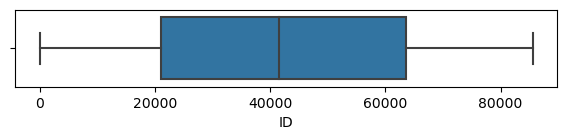

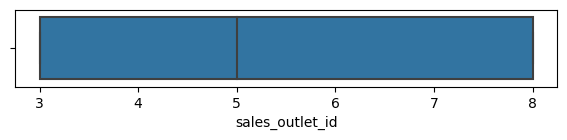

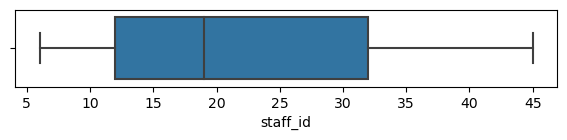

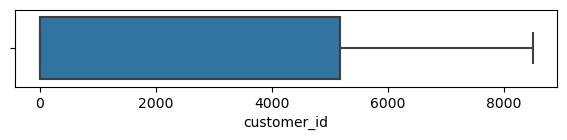

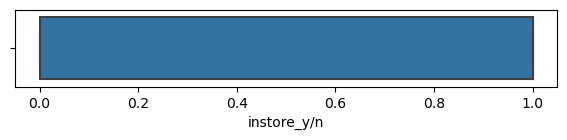

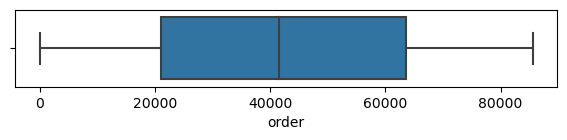

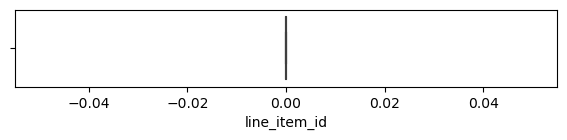

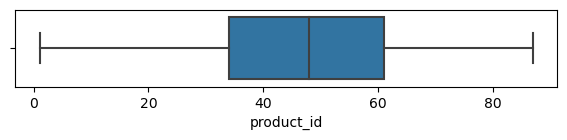

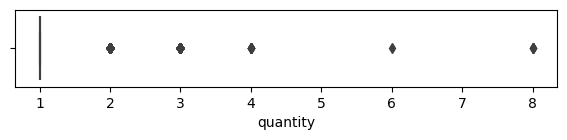

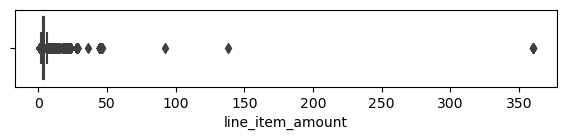

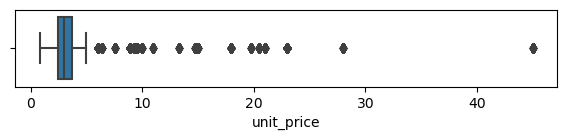

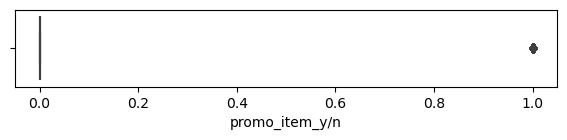

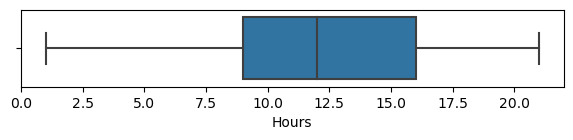

In [13]:
for column in Receipts[numeric_columns]:
        plt.figure(figsize=(7,1))
        sns.boxplot(data=Receipts[numeric_columns], x=column)

## 1.2. Investigate the outliers

In [14]:
# Quantity
outliers_quantity_count = Receipts[Receipts['quantity'] >= 6].shape[0]
print("Number of rows where quantity >= 6:", outliers_quantity_count)

Number of rows where quantity >= 6: 5


In [15]:
outliers_quantity = Receipts[Receipts['quantity'] >= 6]
outliers_quantity

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
17399  14517       09/04/2022 1900-01-01 09:04:04                5        25   
32109  25416       17/04/2022 1900-01-01 11:18:31                8         6   
32123  25424       17/04/2022 1900-01-01 10:41:11                8        44   
32391  25590       17/04/2022 1900-01-01 09:05:20                8        42   
32477  25666       17/04/2022 1900-01-01 09:55:47                8        42   

       customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
17399            0            0  14517             0          82         6   
32109            0            1  25416             0           8         8   
32123            0            1  25424             0           8         8   
32391         8311            1  25590             0           8         8   
32477            0            0  25666             0           8         8   

       line_item_amount  unit_price  promo_item_y/n  Hours  
17399             138.0        23.0               0      9  
32109             360.0        45.0               0     11  
32123             360.0        45.0               0     10  
32391             360.0        45.0               0      9  
32477             360.0        45.0               0      9

In [16]:
Receipts = Receipts[Receipts['quantity'] < 6]

In [17]:
line_item_quantity_count = Receipts[Receipts['line_item_amount'] >= 100].shape[0]
print("Number of rows where line_items >= 100:", line_item_quantity_count)

Number of rows where line_items >= 100: 0


## 1.3. Visualisation

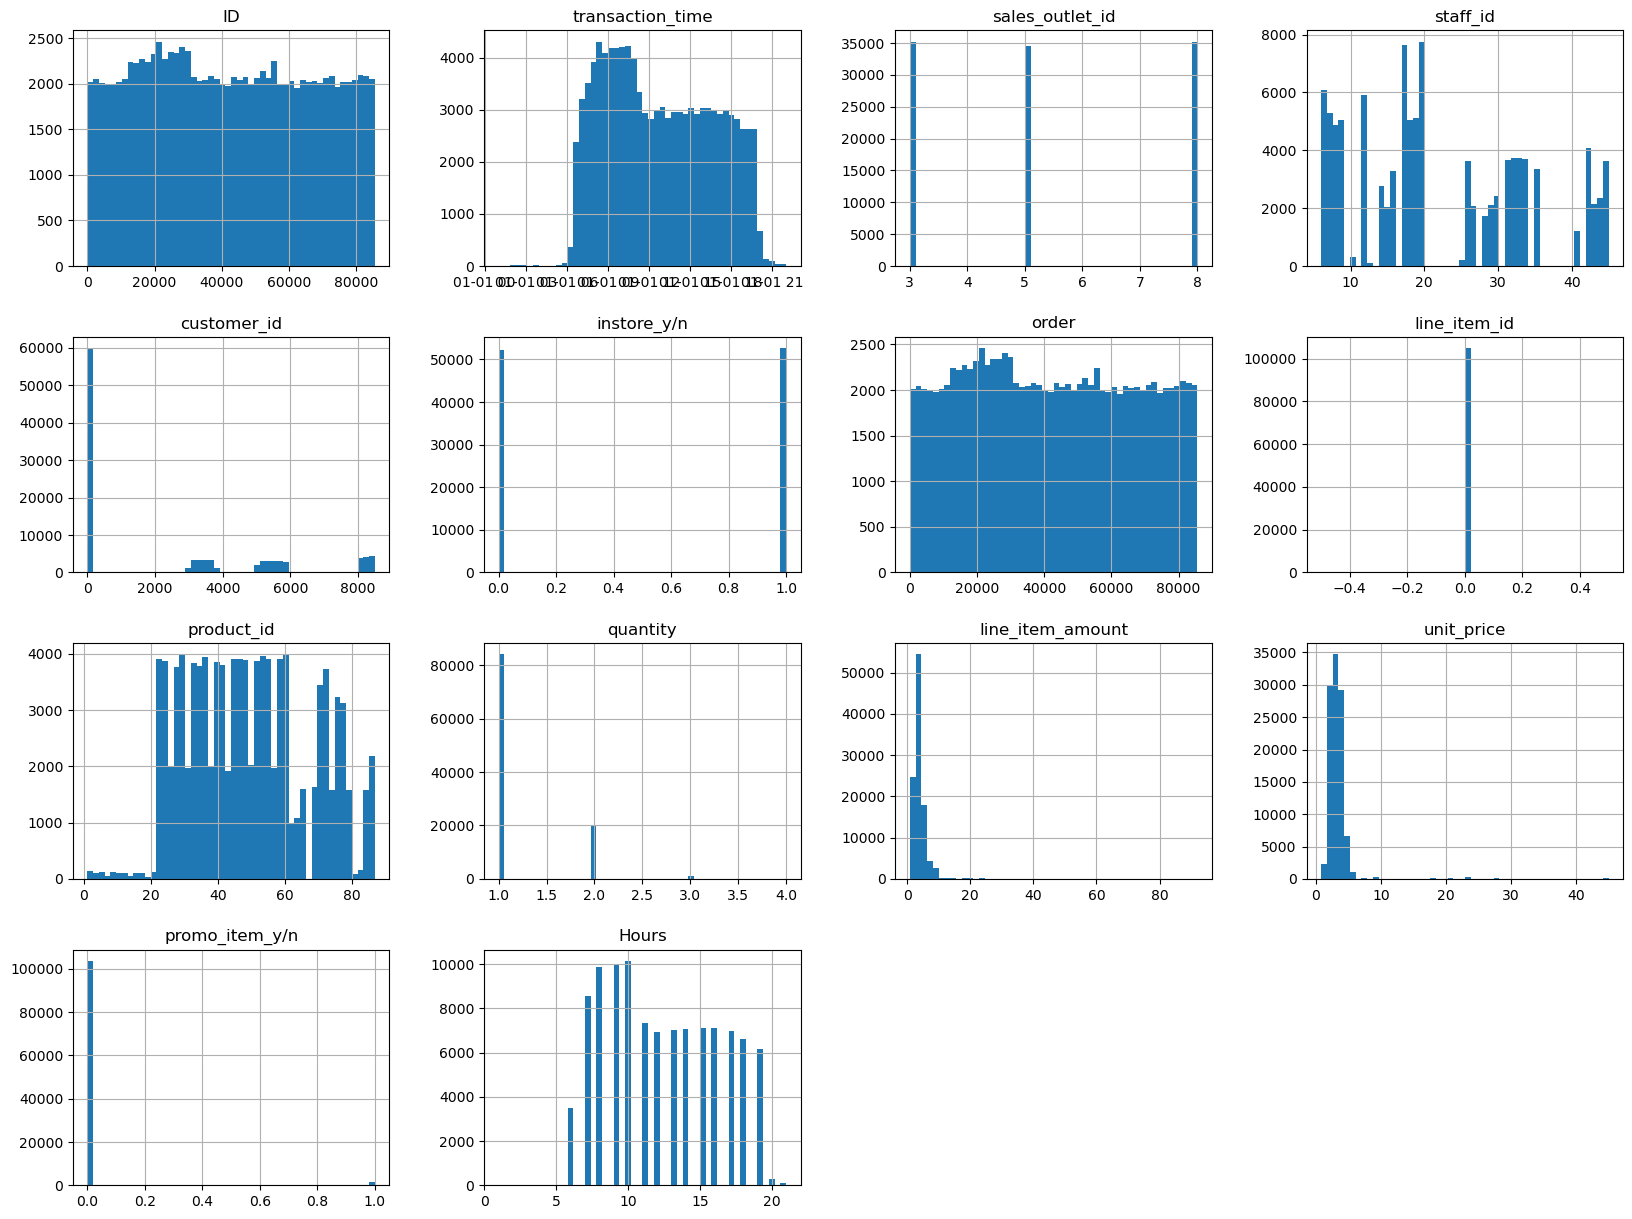

In [18]:
Receipts.hist(bins=50, figsize=(20,15))
plt.show()

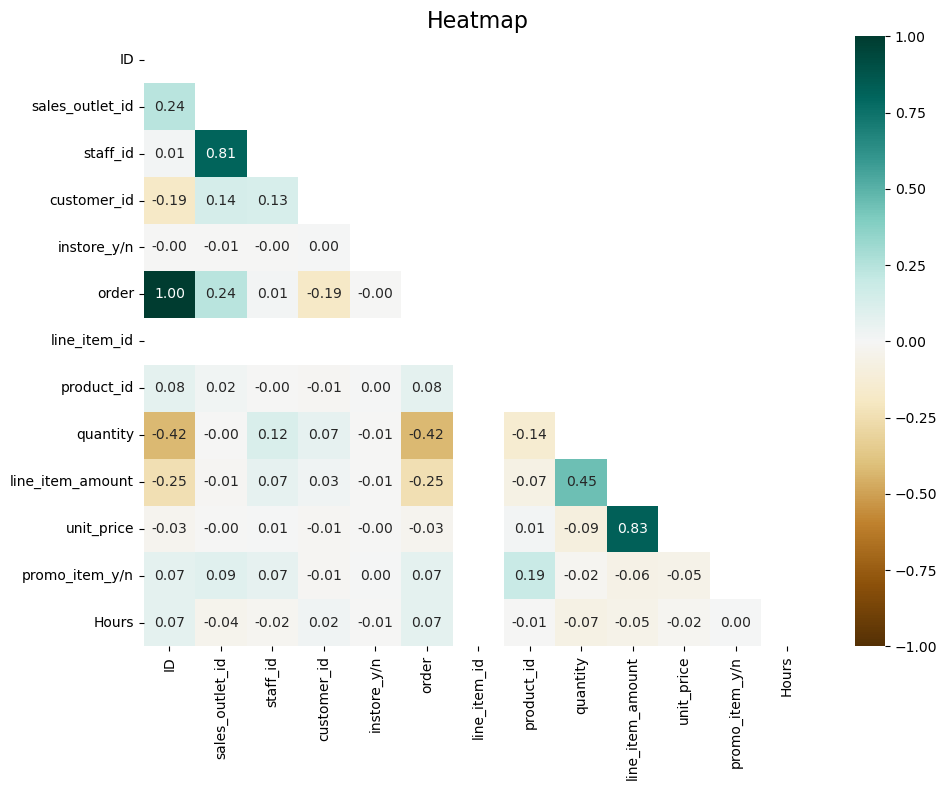

In [19]:
correlation_matrix = Receipts.corr()

# Create masks for lower triangles
lower_triangle_mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix.where(lower_triangle_mask), cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# How many missing values are in columns
Receipts.isna().sum() 

ID                  0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_y/n         0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_y/n      0
Hours               0
dtype: int64

## 1.4. Transactions

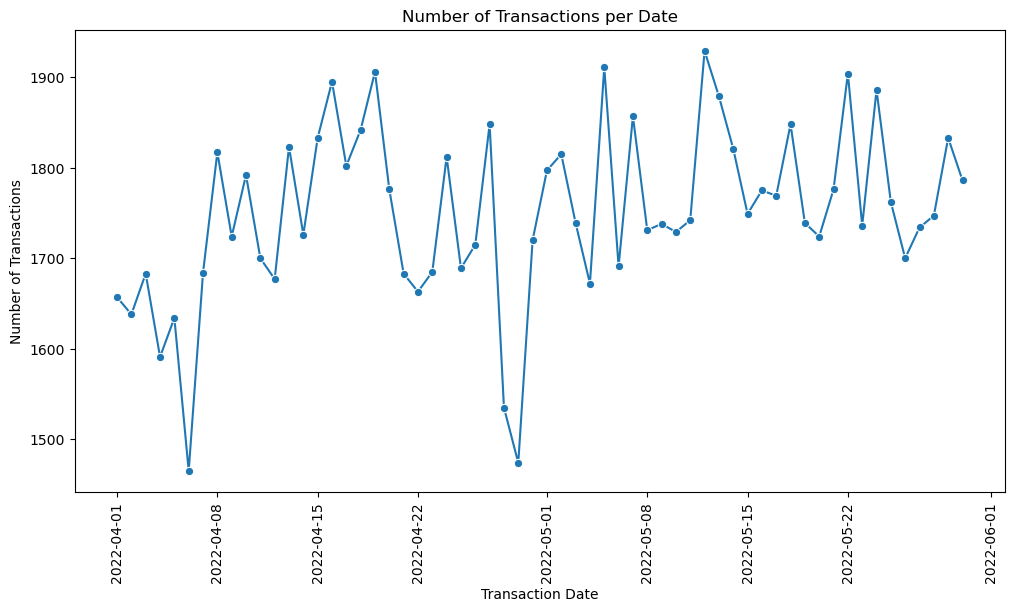

In [21]:
Receipts['transaction_date'] = pd.to_datetime(Receipts['transaction_date'], format='%d/%m/%Y')

# Sort the DataFrame by 'transaction_date'
Receipts_sorted = Receipts.sort_values(by='transaction_date')

# Count the number of transactions per date
transaction_counts = Receipts_sorted['transaction_date'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values, marker='o')
plt.title('Number of Transactions per Date')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Group by 'transaction_date' and count the transactions
daily_transaction_counts = Receipts.groupby('transaction_date')['ID'].count().reset_index()

# Rename the columns if needed
daily_transaction_counts.columns = ['date', 'transaction_count']

# Display the resulting DataFrame
daily_transaction_counts.head()

date  transaction_count
0 2022-04-01               1657
1 2022-04-02               1638
2 2022-04-03               1683
3 2022-04-04               1591
4 2022-04-05               1634

## 1.5. Quantity

In [24]:
# Group by 'transaction_date' and sum the 'quantity'
quantity_by_date = Receipts.groupby('transaction_date')['quantity'].sum().reset_index()

In [25]:
quantity_by_date.head()

transaction_date  quantity
0       2022-04-01      2391
1       2022-04-02      2354
2       2022-04-03      2398
3       2022-04-04      2300
4       2022-04-05      2330

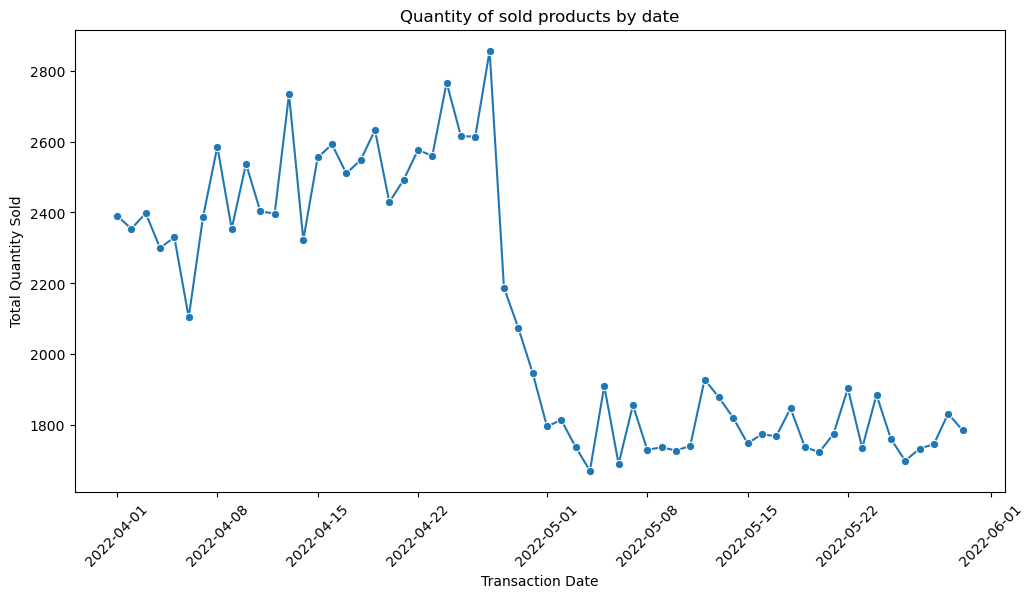

In [26]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_date', y='quantity', data=quantity_by_date, marker='o')
plt.title('Quantity of sold products by date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

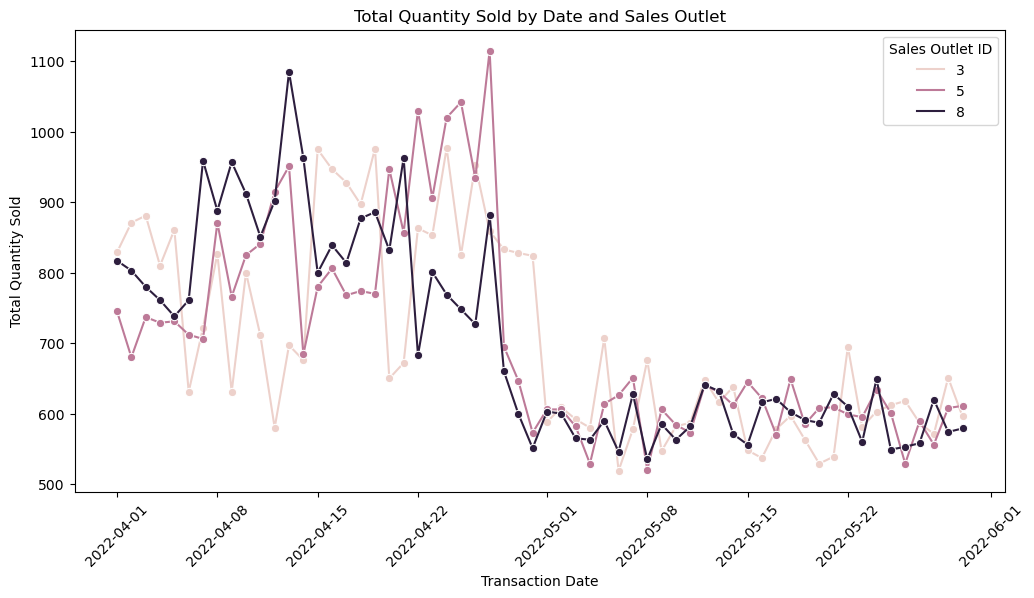

In [27]:
# Group by 'transaction_date', 'sales_outlet_id', and sum the 'quantity'
quantity_by_date_outlet = Receipts.groupby(['transaction_date', 'sales_outlet_id'])['quantity'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_date', y='quantity', hue='sales_outlet_id', data=quantity_by_date_outlet, marker='o')
plt.title('Total Quantity Sold by Date and Sales Outlet')
plt.xlabel('Transaction Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Sales Outlet ID')
plt.show()

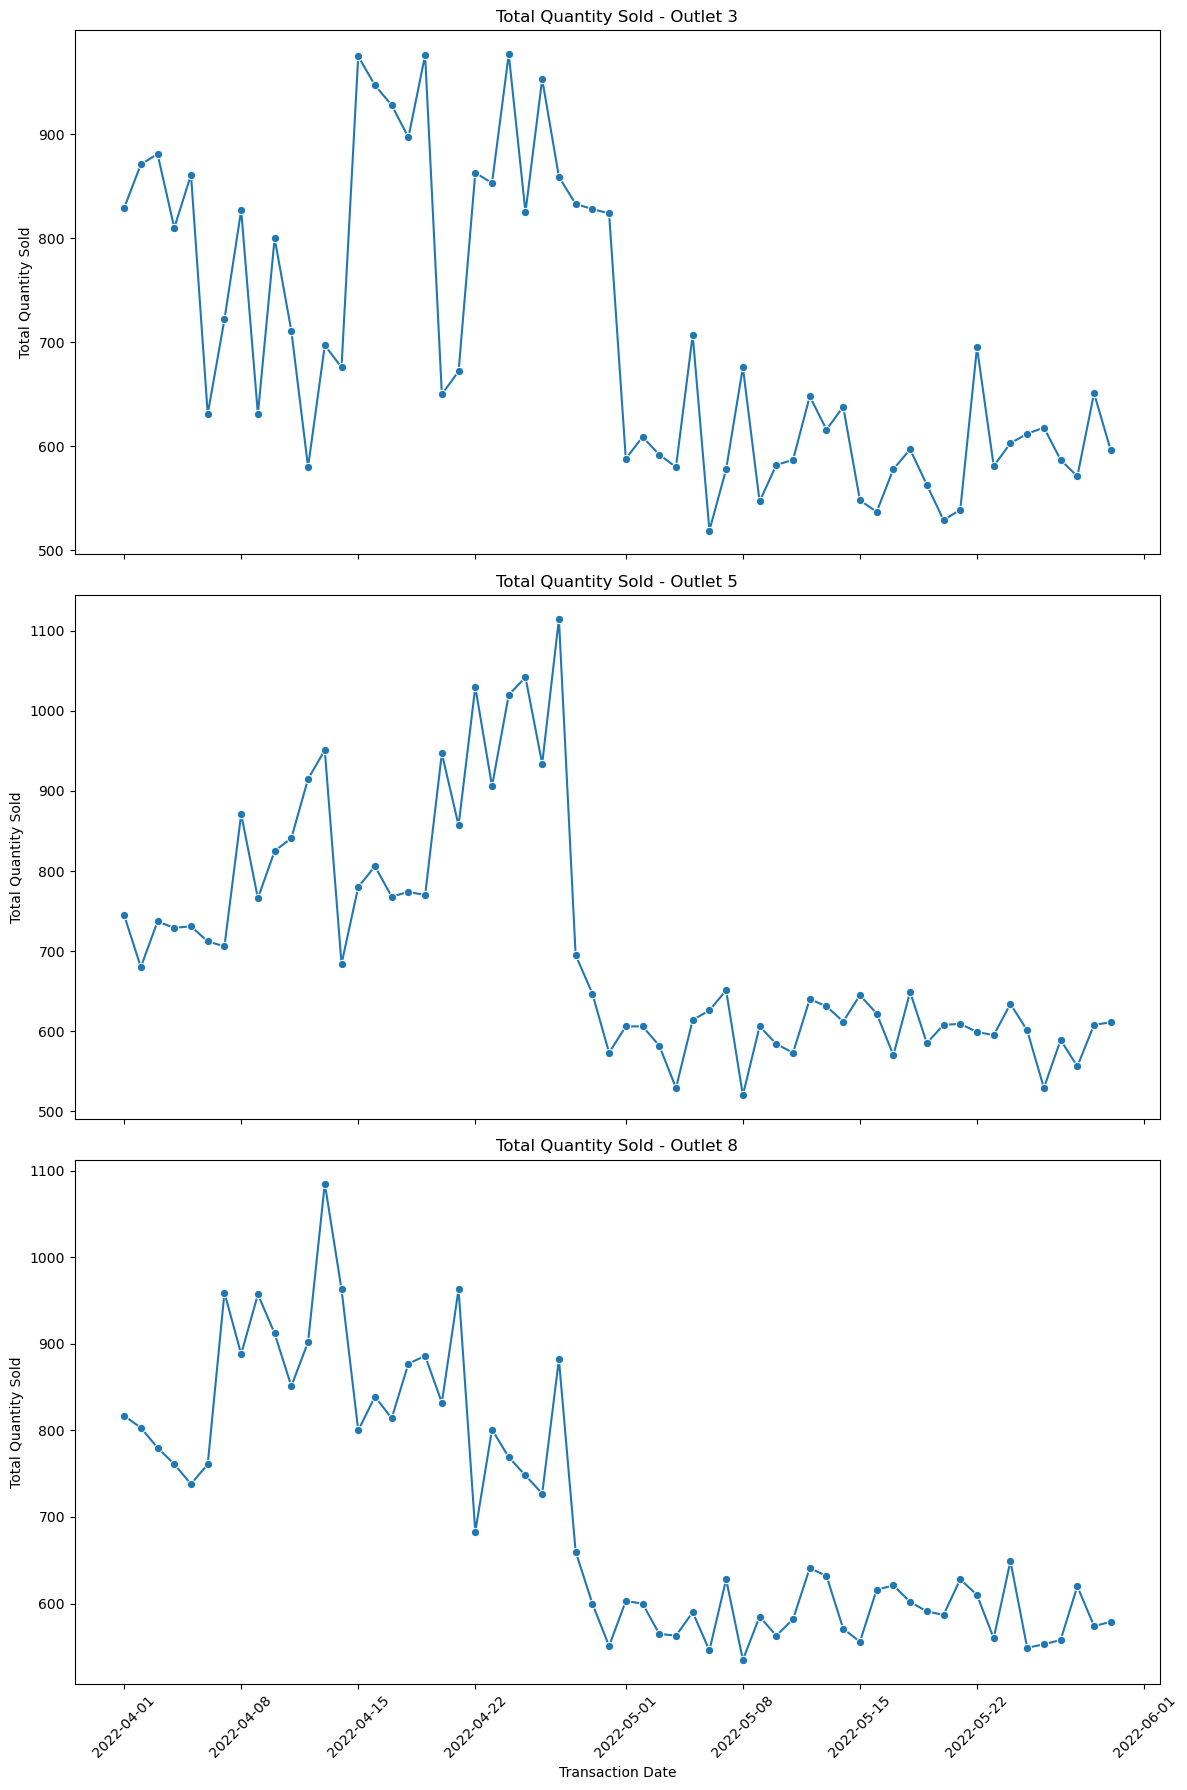

In [28]:
# Group by 'transaction_date', 'sales_outlet_id', and sum the 'quantity'
quantity_by_date_outlet = Receipts.groupby(['transaction_date', 'sales_outlet_id'])['quantity'].sum().reset_index()

# Create subplots for each sales_outlet_id
outlet_ids = sorted(Receipts['sales_outlet_id'].unique())
fig, axes = plt.subplots(nrows=len(outlet_ids), figsize=(12, 6 * len(outlet_ids)), sharex=True)

# Plot the results for each sales_outlet_id
for ax, outlet_id in zip(axes, outlet_ids):
    outlet_data = quantity_by_date_outlet[quantity_by_date_outlet['sales_outlet_id'] == outlet_id]
    sns.lineplot(x='transaction_date', y='quantity', data=outlet_data, marker='o', ax=ax)
    ax.set_title(f'Total Quantity Sold - Outlet {outlet_id}')
    ax.set_xlabel('Transaction Date')
    ax.set_ylabel('Total Quantity Sold')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 1.7. Transactions vs sold quantity

In [29]:
# Set 'date' as index
daily_transaction_counts.set_index('date', inplace=True)
quantity_by_date.set_index('transaction_date', inplace=True)

# Merge the two dataframes based on the index (date)
merged_data = pd.merge(daily_transaction_counts, quantity_by_date, left_index=True, right_index=True)

# Display the resulting DataFrame
print(merged_data)

            transaction_count  quantity
date                                   
2022-04-01               1657      2391
2022-04-02               1638      2354
2022-04-03               1683      2398
2022-04-04               1591      2300
2022-04-05               1634      2330
2022-04-06               1465      2104
2022-04-07               1684      2387
2022-04-08               1817      2586
2022-04-09               1724      2354
2022-04-10               1792      2537
2022-04-11               1700      2403
2022-04-12               1677      2397
2022-04-13               1823      2733
2022-04-14               1726      2323
2022-04-15               1833      2555
2022-04-16               1895      2592
2022-04-17               1802      2510
2022-04-18               1842      2548
2022-04-19               1906      2632
2022-04-20               1776      2429
2022-04-21               1683      2492
2022-04-22               1663      2576
2022-04-23               1685      2560


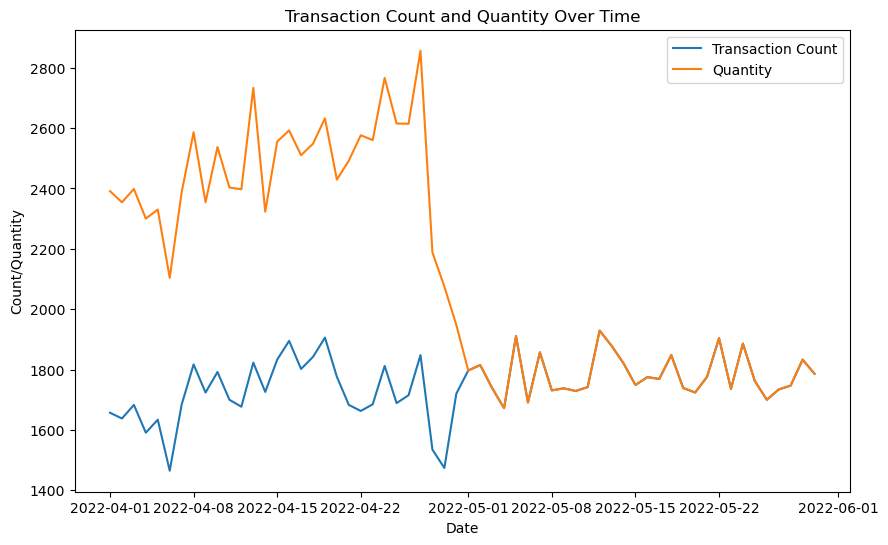

In [30]:
# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['transaction_count'], label='Transaction Count')
plt.plot(merged_data.index, merged_data['quantity'], label='Quantity')
plt.title('Transaction Count and Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Quantity')
plt.legend()
plt.show()

# 2. Predicting number of sold products in next 7 days

### 2.1. Setting frequency

In [31]:
# Count the number of sold products per date
Receipts_F = quantity_by_date.copy()

In [32]:
Receipts_F.head(10)

quantity
transaction_date          
2022-04-01            2391
2022-04-02            2354
2022-04-03            2398
2022-04-04            2300
2022-04-05            2330
2022-04-06            2104
2022-04-07            2387
2022-04-08            2586
2022-04-09            2354
2022-04-10            2537

In [33]:
# Rename the 'quantity' column to 'y'
Receipts_F.rename(columns={'quantity': 'y'}, inplace=True)

In [34]:
# Resample to daily frequency
Receipts_F = Receipts_F.resample('D').asfreq()
Receipts_F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2022-04-01 to 2022-05-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


### 2.2. Decomposition

Text(0.5, 0.98, 'Additive Decompose')

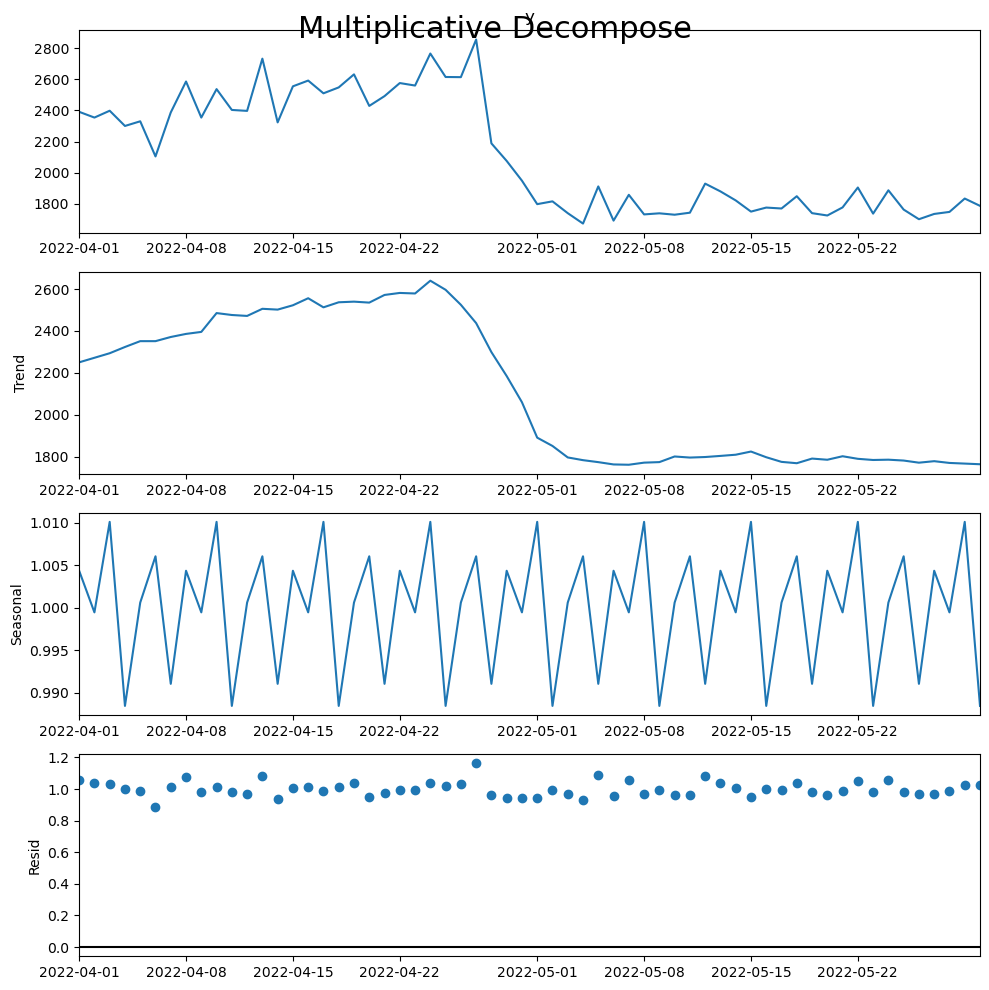

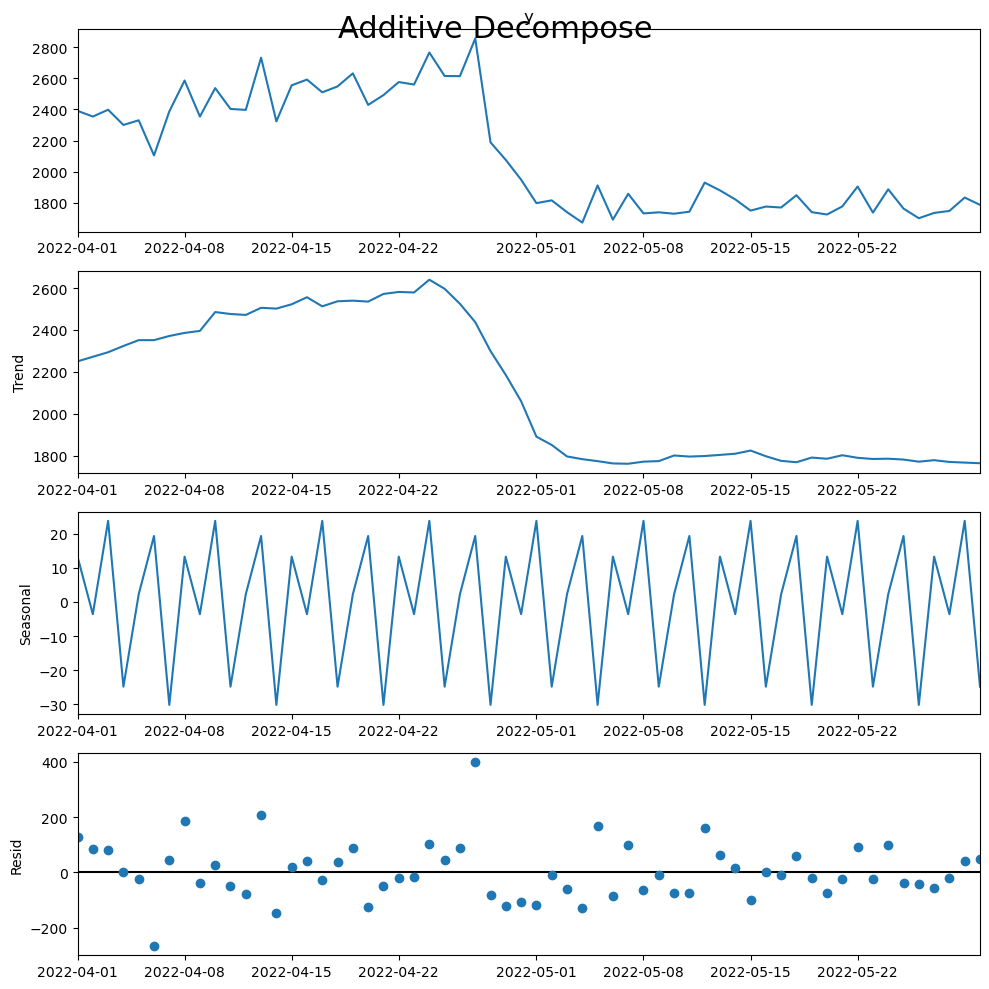

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# Multiplicative Decomposition 
result_mul = seasonal_decompose(Receipts_F['y'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(Receipts_F['y'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

In [36]:
result_add = seasonal_decompose(Receipts_F['y'], model='additive', extrapolate_trend='freq')

# Extract components
trend = result_add.trend
seasonal = result_add.seasonal
residuals = result_add.resid

# Create a new DataFrame with components
decomposition_df = pd.DataFrame({
    'y': Receipts_F['y'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residuals': residuals
})
decomposition_df.head()

y        Trend   Seasonal   Residuals
transaction_date                                          
2022-04-01        2391  2250.153061  13.286079  127.560860
2022-04-02        2354  2271.882653  -3.593740   85.711087
2022-04-03        2398  2293.612245  23.766804   80.620951
2022-04-04        2300  2323.428571 -24.850543    1.421971
2022-04-05        2330  2351.285714   2.249514  -23.535228

### 2.3 Stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(Receipts_F['y'])

# Stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.636995


#### According to p-value result, data is not stationary

#### Differencing - difference between consecutive observations in the time series - when there is a clear trend in the data

In [38]:
Receipts_1 = Receipts_F.copy()

# Differencing
Receipts_1['y'] = Receipts_1['y'] - Receipts_1['y'].shift(1)
Receipts_1 = Receipts_1.dropna()
Receipts_1.head()

y
transaction_date       
2022-04-02        -37.0
2022-04-03         44.0
2022-04-04        -98.0
2022-04-05         30.0
2022-04-06       -226.0

<AxesSubplot:xlabel='transaction_date'>

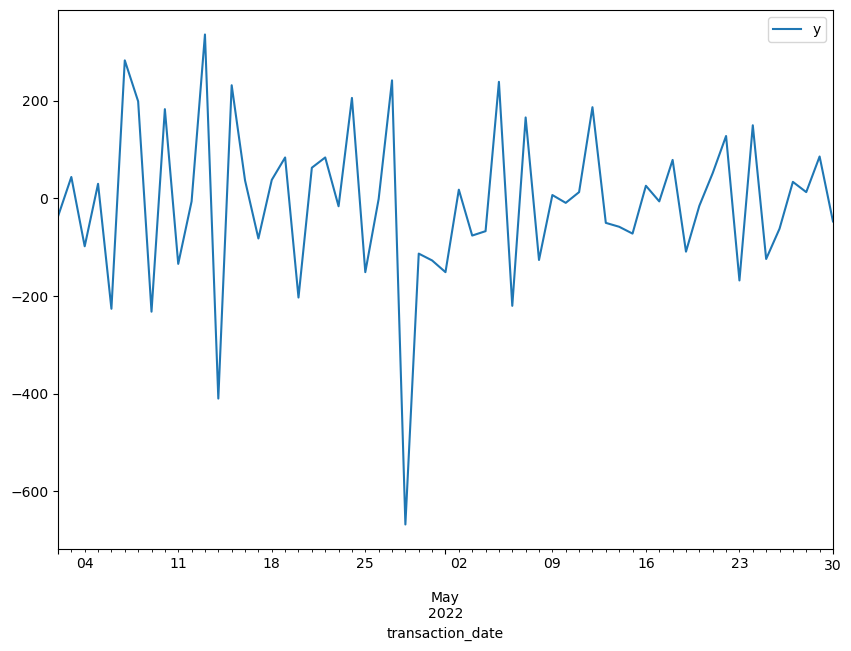

In [39]:
#Visualisation
Receipts_1["y"].plot(figsize = (10, 7), legend = True)

In [40]:
stationarity = adfuller(Receipts_1['y'])
print('Dickey Fuller p-value Differencing: %F' % stationarity[1])

Dickey Fuller p-value Differencing: 0.004022


In [41]:
Receipts_1.tail()

y
transaction_date      
2022-05-26       -62.0
2022-05-27        34.0
2022-05-28        13.0
2022-05-29        86.0
2022-05-30       -47.0

# 3. ML

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [42]:
# Training test split using stationary data (differenced)

test_days = 7
forecast_days = 7
training_set = Receipts_1.iloc[:-test_days, :]
test_set = Receipts_1.iloc[-test_days:, :]
training_set.tail()

y
transaction_date       
2022-05-19       -109.0
2022-05-20        -15.0
2022-05-21         52.0
2022-05-22        128.0
2022-05-23       -168.0

In [43]:
test_set.head()

y
transaction_date       
2022-05-24        150.0
2022-05-25       -124.0
2022-05-26        -62.0
2022-05-27         34.0
2022-05-28         13.0

## ARIMA

In [45]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=681.100, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=688.281, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=677.777, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=678.709, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=686.552, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=681.135, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=679.685, Time=0.43 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=679.142, Time=0.44 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=677.611, Time=0.14 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=679.247, Time=0.37 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=680.906, Time=0.69 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=684.959, Time=0.11 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=679.212, Time=0.19 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=679.420, Time=0.20 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=677.8

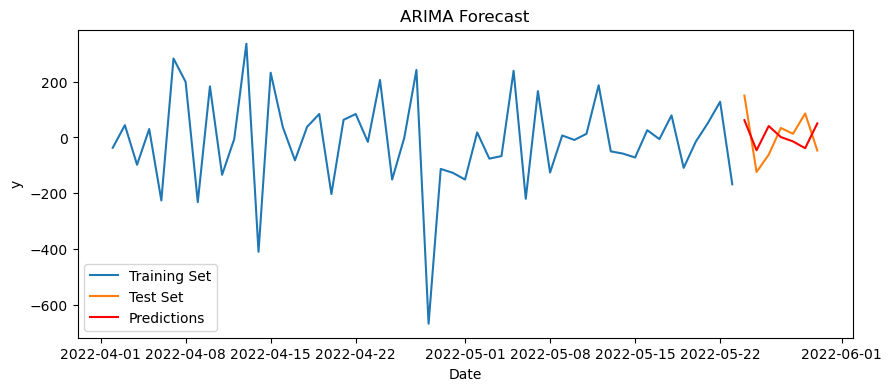

In [46]:
# Specify the order and seasonal_order
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)

# Check if seasonal_order is None and provide a default value
if seasonal_order is None:
    seasonal_order = (0, 0, 0, 0)

# Create and fit the ARIMA model
model = auto_arima(y=training_set['y'],
                   start_p=1, max_p=3,
                   start_q=1, max_q=3,
                   start_P=1, max_P=3,
                   start_Q=1, max_Q=3,
                   m=7, seasonal=True,
                   stepwise=True, suppress_warnings=True, 
                   error_action='ignore', trace=True,
                   order=order, seasonal_order=seasonal_order)

# Make predictions for the next 7 days
predictions = model.predict(n_periods=forecast_days)

# Display the predictions
print("Predictions for the next 7 days:")
print(predictions)

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
# Calculate MAPE
mape = MAPE(test_set['y'], predictions)
print(f'MAPE: {mape:.2f}%')

MAPE: 135.16%


In [48]:
# Create a DataFrame for actual and predicted values
result_df1 = pd.DataFrame({
    'Date': test_set.index,
    'Actual': test_set['y'].values,
    'Predicted': predictions.values
})

# Print the combined DataFrame
print(result_df1)

        Date  Actual  Predicted
0 2022-05-24   150.0  61.791502
1 2022-05-25  -124.0 -46.047223
2 2022-05-26   -62.0  40.947532
3 2022-05-27    34.0   1.327263
4 2022-05-28    13.0 -14.341765
5 2022-05-29    86.0 -38.647867
6 2022-05-30   -47.0  50.311025


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=681.100, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=688.281, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=677.777, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=678.709, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=686.552, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=681.135, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=679.685, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=679.142, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=677.611, Time=0.13 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=679.247, Time=0.40 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=680.906, Time=0.70 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=684.959, Time=0.12 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=679.212, Time=0.19 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=679.420, Time=0.21 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=677.8

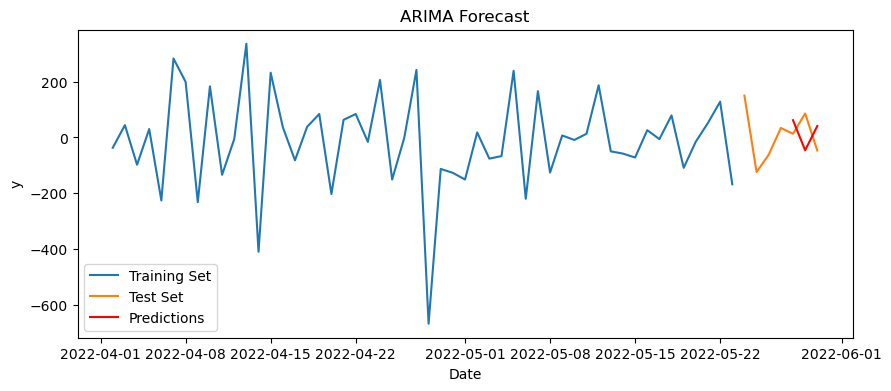

In [49]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)

# Checking if seasonal_order is None and provide a default value
if seasonal_order is None:
    seasonal_order = (0, 0, 0, 0)

# Hyperparameter tuning
model = auto_arima(y=training_set['y'],
                   start_p=1, max_p=3,
                   start_q=1, max_q=3,
                   start_P=1, max_P=3,
                   start_Q=1, max_Q=3,
                   m=7, seasonal=True,
                   stepwise=True, suppress_warnings=True, 
                   error_action='ignore', trace=True,
                   order=order, seasonal_order=seasonal_order)

# Make predictions for the next 3 days
predictions = model.predict(n_periods=3)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(model.get_params())

# Display the predictions
print("Predictions for the last 3 days:")
print(predictions)

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index[-3:], predictions, label='Predictions', color='red') 
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [50]:
# Calculate MAPE for the last 3 days of the test set
mape = MAPE(test_set['y'][-3:], predictions)
print(f'MAPE: {mape:.2f}%')

MAPE: 238.66%


### Arima - detrending and differencing

In [51]:
Receipts_F.head()

y
transaction_date      
2022-04-01        2391
2022-04-02        2354
2022-04-03        2398
2022-04-04        2300
2022-04-05        2330

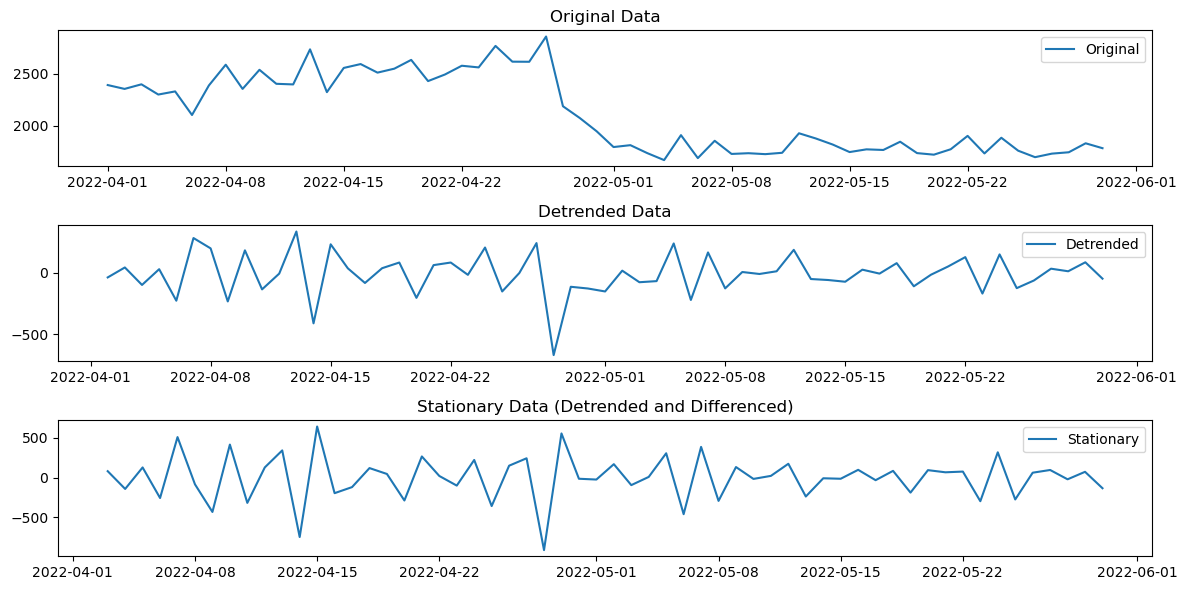

ADF Statistic: -13.970913443549103
p-value: 4.346947926103088e-26
Critical Values: {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}
The time series is stationary.


In [52]:
Receipts_2 = Receipts_F.copy()

# Detrend
Receipts_2['detrended'] = Receipts_2['y'].diff(1)

# Remove Seasonality
Receipts_2['stationary'] = Receipts_2['detrended'].diff(1)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(Receipts_2['y'], label='Original')
plt.title('Original Data')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(Receipts_2['detrended'], label='Detrended')
plt.title('Detrended Data')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(Receipts_2['stationary'], label='Stationary')
plt.title('Stationary Data (Detrended and Differenced)')
plt.legend()

plt.tight_layout()
plt.show()

# Check stationarity with ADF test
result = adfuller(Receipts_2['stationary'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the ADF test
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

In [53]:
Receipts_2.head()

y  detrended  stationary
transaction_date                             
2022-04-01        2391        NaN         NaN
2022-04-02        2354      -37.0         NaN
2022-04-03        2398       44.0        81.0
2022-04-04        2300      -98.0      -142.0
2022-04-05        2330       30.0       128.0

In [54]:
# Remve 'y' and 'detrended' columns
Receipts_2.drop(['y', 'detrended'], axis=1, inplace=True)

# Verify the updated DataFrame
Receipts_2.head()

stationary
transaction_date            
2022-04-01               NaN
2022-04-02               NaN
2022-04-03              81.0
2022-04-04            -142.0
2022-04-05             128.0

In [55]:
# Remove NaN values
Receipts_2 = Receipts_2.dropna()

# Verify the updated DataFrame
Receipts_2.head()

stationary
transaction_date            
2022-04-03              81.0
2022-04-04            -142.0
2022-04-05             128.0
2022-04-06            -256.0
2022-04-07             509.0

In [56]:
# Define the number of test days
test_days = 7

# Split the dataset into training and test sets
training_set = Receipts_2.iloc[:-test_days, :]
test_set = Receipts_2.iloc[-test_days:, :]

# Verify the training and test sets
print("Training Set:")
print(training_set)
print("\nTest Set:")
print(test_set)

Training Set:
                  stationary
transaction_date            
2022-04-03              81.0
2022-04-04            -142.0
2022-04-05             128.0
2022-04-06            -256.0
2022-04-07             509.0
2022-04-08             -84.0
2022-04-09            -431.0
2022-04-10             415.0
2022-04-11            -317.0
2022-04-12             128.0
2022-04-13             342.0
2022-04-14            -746.0
2022-04-15             642.0
2022-04-16            -195.0
2022-04-17            -119.0
2022-04-18             120.0
2022-04-19              46.0
2022-04-20            -287.0
2022-04-21             266.0
2022-04-22              21.0
2022-04-23            -100.0
2022-04-24             222.0
2022-04-25            -357.0
2022-04-26             150.0
2022-04-27             243.0
2022-04-28            -910.0
2022-04-29             555.0
2022-04-30             -14.0
2022-05-01             -24.0
2022-05-02             169.0
2022-05-03             -94.0
2022-05-04               9.0


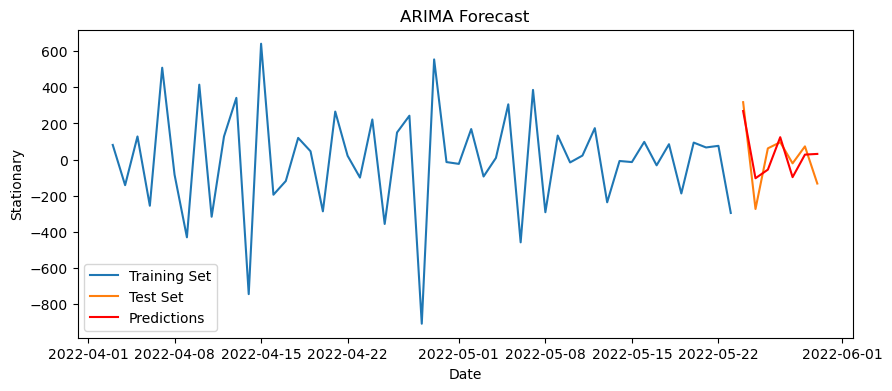

Predictions for the test set:
2022-05-24    268.886573
2022-05-25   -103.647952
2022-05-26    -55.941540
2022-05-27    123.928504
2022-05-28    -97.632463
2022-05-29     27.442527
2022-05-30     31.191902
Freq: D, dtype: float64


In [57]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Create and fit the ARIMA model
model = auto_arima(y=training_set['stationary'],
                   suppress_warnings=True,
                   seasonal=False,
                   stepwise=True)

# Make predictions for the test set
predictions = model.predict(n_periods=len(test_set))


# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['stationary'], label='Training Set')
plt.plot(test_set.index, test_set['stationary'], label='Test Set')
plt.plot(test_set.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stationary')
plt.legend()
plt.show()


# Display the predictions
print("Predictions for the test set:")
print(predictions)

In [58]:
# Calculate MAPE
mape_detrend = MAPE(test_set['stationary'], predictions)
print(f'MAPE: {mape_detrend:.2f}%')

MAPE: 121.10%


In [59]:
# Create a DataFrame for actual and predicted values
result_df = pd.DataFrame({
    'Date': test_set.index,
    'Actual': test_set['stationary'].values,
    'Predicted': predictions.values
})

# Print the combined DataFrame
print(result_df)

        Date  Actual   Predicted
0 2022-05-24   318.0  268.886573
1 2022-05-25  -274.0 -103.647952
2 2022-05-26    62.0  -55.941540
3 2022-05-27    96.0  123.928504
4 2022-05-28   -21.0  -97.632463
5 2022-05-29    73.0   27.442527
6 2022-05-30  -133.0   31.191902


## SARIMA

In [60]:
# Training test split using stationary data (differenced)

test_days = 7
forecast_days = 7
training_set = Receipts_1.iloc[:-test_days, :]
test_set = Receipts_1.iloc[-test_days:, :]
training_set.tail()

y
transaction_date       
2022-05-19       -109.0
2022-05-20        -15.0
2022-05-21         52.0
2022-05-22        128.0
2022-05-23       -168.0

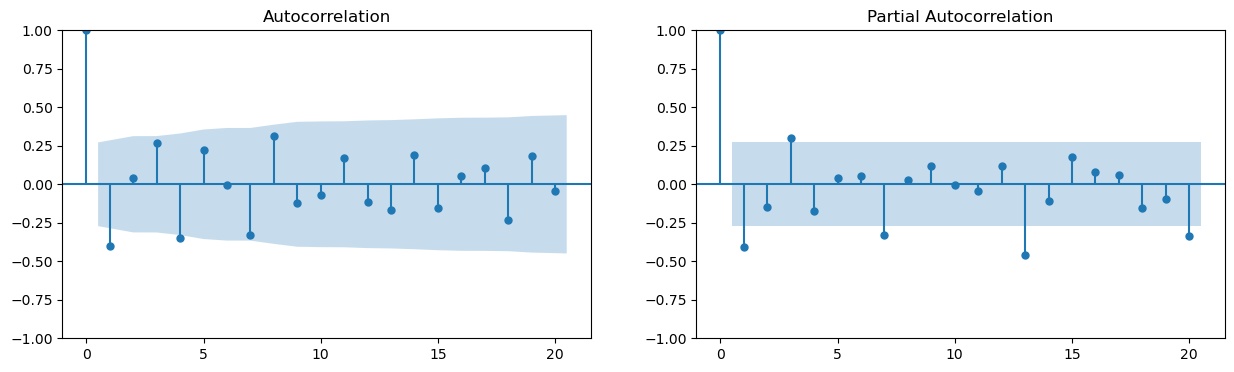

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(training_set['y'], lags=20, ax=axes[0])
plot_pacf(training_set['y'], lags=20, ax=axes[1])
plt.show()

In [62]:


ts = training_set['y']

# Calculate ACF and PACF
acf_values = acf(ts, nlags=20)
pacf_values = pacf(ts, nlags=20)

# Create a DataFrame to display the results
lags_acf = np.arange(1, 21)
lags_pacf = np.arange(1, 21)

results_table = pd.DataFrame({
    'Lag (ACF)': lags_acf,
    'ACF': acf_values[1:],
    'Lag (PACF)': lags_pacf,
    'PACF': pacf_values[1:],
})

# Display the results table
print(results_table)

    Lag (ACF)       ACF  Lag (PACF)      PACF
0           1 -0.401905           1 -0.409786
1           2  0.041480           2 -0.149969
2           3  0.269526           3  0.301098
3           4 -0.346143           4 -0.174930
4           5  0.223041           5  0.039053
5           6 -0.002800           6  0.053681
6           7 -0.329191           7 -0.327230
7           8  0.316248           8  0.030732
8           9 -0.119107           9  0.116330
9          10 -0.071949          10 -0.007270
10         11  0.171261          11 -0.046414
11         12 -0.113458          12  0.120489
12         13 -0.169909          13 -0.461826
13         14  0.190684          14 -0.110897
14         15 -0.152592          15  0.177269
15         16  0.051037          16  0.078752
16         17  0.108183          17  0.058412
17         18 -0.230475          18 -0.155262
18         19  0.183378          19 -0.097956
19         20 -0.041537          20 -0.338728


In [63]:
# Non-seasonal parameters
p, d, q = 1, 1, 1

# Seasonal parameters
P, D, Q, s = 0, 0, 1, 13

# Create and fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(training_set['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Make predictions
predictions = sarima_result.get_forecast(steps=len(test_set))

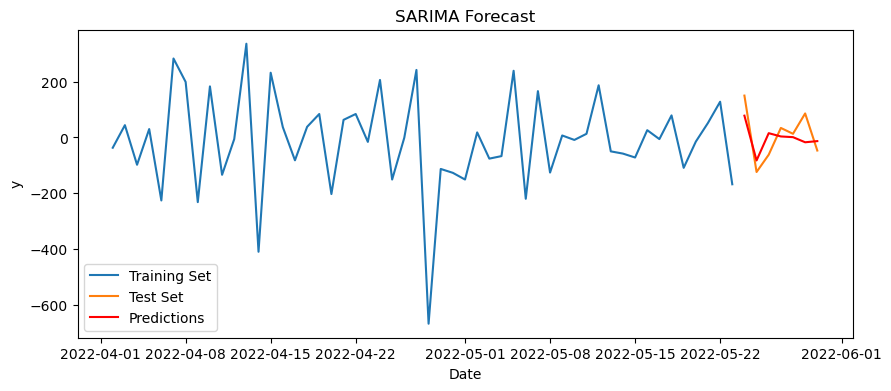

MAPE: 82.91%


In [64]:
# Make predictions
predictions = sarima_result.get_forecast(steps=len(test_set))

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['y'], label='Training Set')
plt.plot(test_set.index, test_set['y'], label='Test Set')
plt.plot(test_set.index, predictions.predicted_mean, label='Predictions', color='red')

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()


# Calculate MAPE
mape = np.mean(np.abs((test_set['y'] - predictions.predicted_mean) / test_set['y'])) * 100
print(f'MAPE: {mape:.2f}%')

### Sarima detrend and defferenced

In [65]:
Receipts_2.head()

stationary
transaction_date            
2022-04-03              81.0
2022-04-04            -142.0
2022-04-05             128.0
2022-04-06            -256.0
2022-04-07             509.0

In [66]:
# Define the number of test days
test_days = 7

# Split the dataset into training and test sets
training_set = Receipts_2.iloc[:-test_days, :]
test_set = Receipts_2.iloc[-test_days:, :]

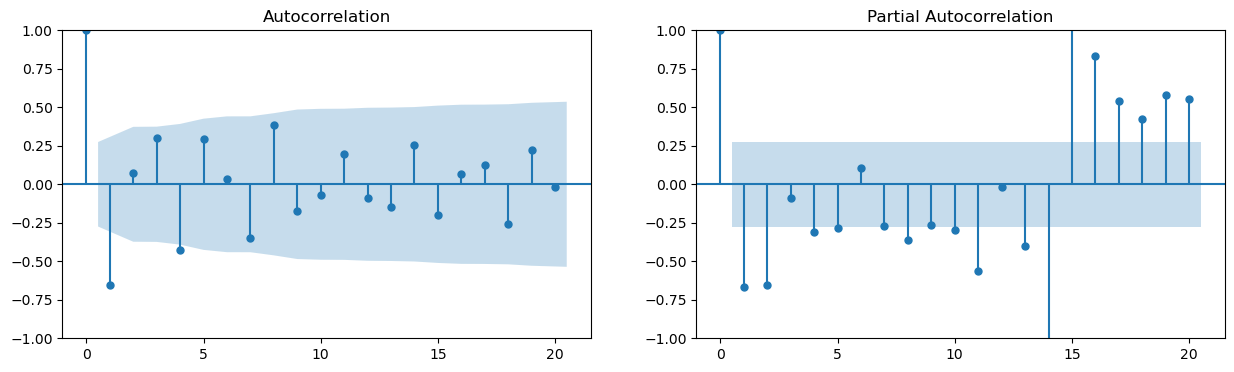

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(training_set['stationary'], lags=20, ax=axes[0])
plot_pacf(training_set['stationary'], lags=20, ax=axes[1])
plt.show()

In [68]:
ts = training_set['stationary']

# Calculate ACF and PACF
acf_values = acf(ts, nlags=20)
pacf_values = pacf(ts, nlags=20)

# Create a DataFrame to display the results
lags_acf = np.arange(1, 21)
lags_pacf = np.arange(1, 21)

results_table = pd.DataFrame({
    'Lag (ACF)': lags_acf,
    'ACF': acf_values[1:],
    'Lag (PACF)': lags_pacf,
    'PACF': pacf_values[1:],
})

# Display the results table
print(results_table)

    Lag (ACF)       ACF  Lag (PACF)      PACF
0           1 -0.650943           1 -0.663962
1           2  0.073855           2 -0.650939
2           3  0.300945           3 -0.087461
3           4 -0.429667           4 -0.307077
4           5  0.294496           5 -0.281233
5           6  0.032472           6  0.107257
6           7 -0.349704           7 -0.273318
7           8  0.386349           8 -0.359523
8           9 -0.174304           9 -0.264037
9          10 -0.069371          10 -0.295572
10         11  0.199518          11 -0.566160
11         12 -0.091923          12 -0.016353
12         13 -0.146968          13 -0.402541
13         14  0.251916          14 -1.236198
14         15 -0.201570          15  4.415528
15         16  0.063562          16  0.830335
16         17  0.128400          17  0.539147
17         18 -0.255079          18  0.426822
18         19  0.219690          19  0.580934
19         20 -0.014460          20  0.551672


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=728.402, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=702.037, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=726.406, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=678.832, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=680.477, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=676.834, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=700.039, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=678.480, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0

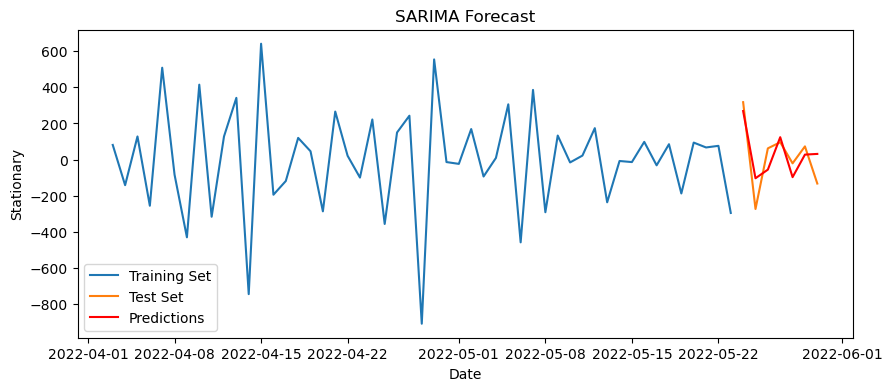

In [69]:
# Use auto_arima to automatically select the best SARIMA model
model = pm.auto_arima(training_set['stationary'], seasonal=True, stepwise=True, suppress_warnings=True, trace=True)

# Make predictions for the next 7 days
predictions = model.predict(n_periods=test_days)

# Display the predictions
print("Predictions for the next 7 days:")
print(predictions)

# Calculate MAE for evaluation
mae = mean_absolute_error(test_set['stationary'], predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Plotting the results
plt.figure(figsize=(10, 4))
plt.plot(training_set.index, training_set['stationary'], label='Training Set')
plt.plot(test_set.index, test_set['stationary'], label='Test Set')
plt.plot(test_set.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stationary')
plt.legend()
plt.show()

In [71]:
# Calculate MAPE
mape_detrend = MAPE(test_set['stationary'], predictions)
print(f'MAPE: {mape_detrend:.2f}%')

MAPE: 121.10%


# 2. Customers data sest

In [72]:
df2 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\IBM Datasets\\customer.csv")
df2.head()

customer_id  home_store customer_first-name        customer_email  \
0         3001           3           Kelly Key  Venus@adipiscing.edu   
1         3002           3     Clark Schroeder        Nora@fames.gov   
2         3003           3      Elvis Cardenas    Brianna@tellus.edu   
3         3004           3        Rafael Estes           Ina@non.gov   
4         3005           3          Colin Lynn      Dale@Integer.com   

  customer_since loyalty_card_number   birthdate  gender  birth_year  
0     04/01/2017        908-424-2890  29/05/1950       0        1950  
1     07/01/2017        032-732-6308  30/07/1950       0        1950  
2     10/01/2017        459-375-9187  30/09/1950       0        1950  
3     13/01/2017        576-640-9226  01/12/1950       0        1950  
4     15/01/2017        344-674-6569  01/02/1951       0        1951

## 2.1. EDA

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   int64 
 8   birth_year           2246 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 158.0+ KB


In [74]:
# Count duplicates
duplicate_count = df2.duplicated().sum()

# Print one duplicate entry
if duplicate_count > 0:
    duplicate_entry = df2[df2.duplicated()].head(1)
    print(f"Duplicate Count: {duplicate_count}")
else:
    print("No duplicates found.")

No duplicates found.


In [75]:
# Select only non-object columns
numeric_columns = df2.select_dtypes(exclude='object').columns

df2[numeric_columns].describe() 

customer_id   home_store       gender   birth_year
count  2246.000000  2246.000000  2246.000000  2246.000000
mean   5354.468388     4.956812     0.569902  1978.385574
std    1814.870528     1.852562     0.495200    14.925503
min    3001.000000     3.000000     0.000000  1950.000000
25%    3562.250000     3.000000     0.000000  1965.000000
50%    5323.500000     5.000000     1.000000  1981.000000
75%    5884.750000     5.000000     1.000000  1991.000000
max    8501.000000     8.000000     1.000000  2001.000000

## Merging data sets

In [76]:
# Merge 'df1' and 'df2' on 'customer_id' with a left join
transactions_df = pd.merge(Receipts, df2, on='customer_id', how='left')
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  \
0            0            0      1             0          38  ...   
1            0            0      1             0          84  ...   
2            0            0      2             0          51  ...   
3            0            1      3             0          33  ...   
4         8232            1      4             0          27  ...   

   promo_item_y/n  Hours  home_store  customer_first-name     customer_email  \
0               0      9         NaN                  NaN                NaN   
1               0      9         NaN                  NaN                NaN   
2               0      8         NaN                  NaN                NaN   
3               0      9         NaN                  NaN                NaN   
4               0      8         8.0                Ronan  Molly@viverra.com   

   customer_since loyalty_card_number   birthdate gender birth_year  
0             NaN                 NaN         NaN    NaN        NaN  
1             NaN                 NaN         NaN    NaN        NaN  
2             NaN                 NaN         NaN    NaN        NaN  
3             NaN                 NaN         NaN    NaN        NaN  
4      24/01/2018        399-005-7357  20/03/1974    0.0     1974.0  

[5 rows x 23 columns]

In [77]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105008 entries, 0 to 105007
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   105008 non-null  int64         
 1   transaction_date     105008 non-null  datetime64[ns]
 2   transaction_time     105008 non-null  datetime64[ns]
 3   sales_outlet_id      105008 non-null  int64         
 4   staff_id             105008 non-null  int64         
 5   customer_id          105008 non-null  int64         
 6   instore_y/n          105008 non-null  int64         
 7   order                105008 non-null  int64         
 8   line_item_id         105008 non-null  int64         
 9   product_id           105008 non-null  int64         
 10  quantity             105008 non-null  int64         
 11  line_item_amount     105008 non-null  float64       
 12  unit_price           105008 non-null  float64       
 13  promo_item_y/n

In [78]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'], format='%d/%m/%Y')
transactions_df['birthdate'] = pd.to_datetime(transactions_df['birthdate'], format='%d/%m/%Y')
transactions_df['customer_since'] = pd.to_datetime(transactions_df['customer_since'], format='%d/%m/%Y')

In [79]:
columns_to_drop = ['customer_first-name', 'customer_email', 'loyalty_card_number']
transactions_df = transactions_df.drop(columns=columns_to_drop)

In [80]:
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
0            0            0      1             0          38         2   
1            0            0      1             0          84         1   
2            0            0      2             0          51         2   
3            0            1      3             0          33         1   
4         8232            1      4             0          27         1   

   line_item_amount  unit_price  promo_item_y/n  Hours  home_store  \
0               7.5        3.75               0      9         NaN   
1               0.8        0.80               0      9         NaN   
2               6.0        3.00               0      8         NaN   
3               3.5        3.50               0      9         NaN   
4               3.5        3.50               0      8         8.0   

  customer_since  birthdate  gender  birth_year  
0            NaT        NaT     NaN         NaN  
1            NaT        NaT     NaN         NaN  
2            NaT        NaT     NaN         NaN  
3            NaT        NaT     NaN         NaN  
4     2018-01-24 1974-03-20     0.0      1974.0

In [81]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105008 entries, 0 to 105007
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                105008 non-null  int64         
 1   transaction_date  105008 non-null  datetime64[ns]
 2   transaction_time  105008 non-null  datetime64[ns]
 3   sales_outlet_id   105008 non-null  int64         
 4   staff_id          105008 non-null  int64         
 5   customer_id       105008 non-null  int64         
 6   instore_y/n       105008 non-null  int64         
 7   order             105008 non-null  int64         
 8   line_item_id      105008 non-null  int64         
 9   product_id        105008 non-null  int64         
 10  quantity          105008 non-null  int64         
 11  line_item_amount  105008 non-null  float64       
 12  unit_price        105008 non-null  float64       
 13  promo_item_y/n    105008 non-null  int64         
 14  Hour

In [82]:
numeric_columns = transactions_df.select_dtypes(exclude='object').columns

transactions_df[numeric_columns].describe() 

ID  sales_outlet_id       staff_id    customer_id  \
count  105008.000000    105008.000000  105008.000000  105008.000000   
mean    42266.766599         5.335860      22.332375    2365.497200   
std     24570.047541         2.061759      11.811084    3003.816626   
min         1.000000         3.000000       6.000000       0.000000   
25%     21131.000000         3.000000      12.000000       0.000000   
50%     41586.000000         5.000000      19.000000       0.000000   
75%     63546.000000         8.000000      32.000000    5176.000000   
max     85585.000000         8.000000      45.000000    8501.000000   

         instore_y/n          order  line_item_id     product_id  \
count  105008.000000  105008.000000      105008.0  105008.000000   
mean        0.502000   42266.766599           0.0      49.332775   
std         0.499998   24570.047541           0.0      18.050658   
min         0.000000       1.000000           0.0       1.000000   
25%         0.000000   21131.000000           0.0      34.000000   
50%         1.000000   41586.000000           0.0      48.000000   
75%         1.000000   63546.000000           0.0      61.000000   
max         1.000000   85585.000000           0.0      87.000000   

            quantity  line_item_amount     unit_price  promo_item_y/n  \
count  105008.000000     105008.000000  105008.000000   105008.000000   
mean        1.210117          3.931559       3.314426        0.012475   
std         0.432805          2.407574       2.024389        0.110994   
min         1.000000          0.800000       0.800000        0.000000   
25%         1.000000          3.000000       2.500000        0.000000   
50%         1.000000          3.250000       3.000000        0.000000   
75%         1.000000          4.400000       3.750000        0.000000   
max         4.000000         92.000000      45.000000        1.000000   

               Hours    home_store        gender    birth_year  
count  105008.000000  45009.000000  45009.000000  45009.000000  
mean       12.291006      5.132196      0.567242   1978.420649  
std         3.895217      1.957565      0.495463     15.028932  
min         1.000000      3.000000      0.000000   1950.000000  
25%         9.000000      3.000000      0.000000   1965.000000  
50%        12.000000      5.000000      1.000000   1981.000000  
75%        16.000000      8.000000      1.000000   1992.000000  
max        21.000000      8.000000      1.000000   2001.000000

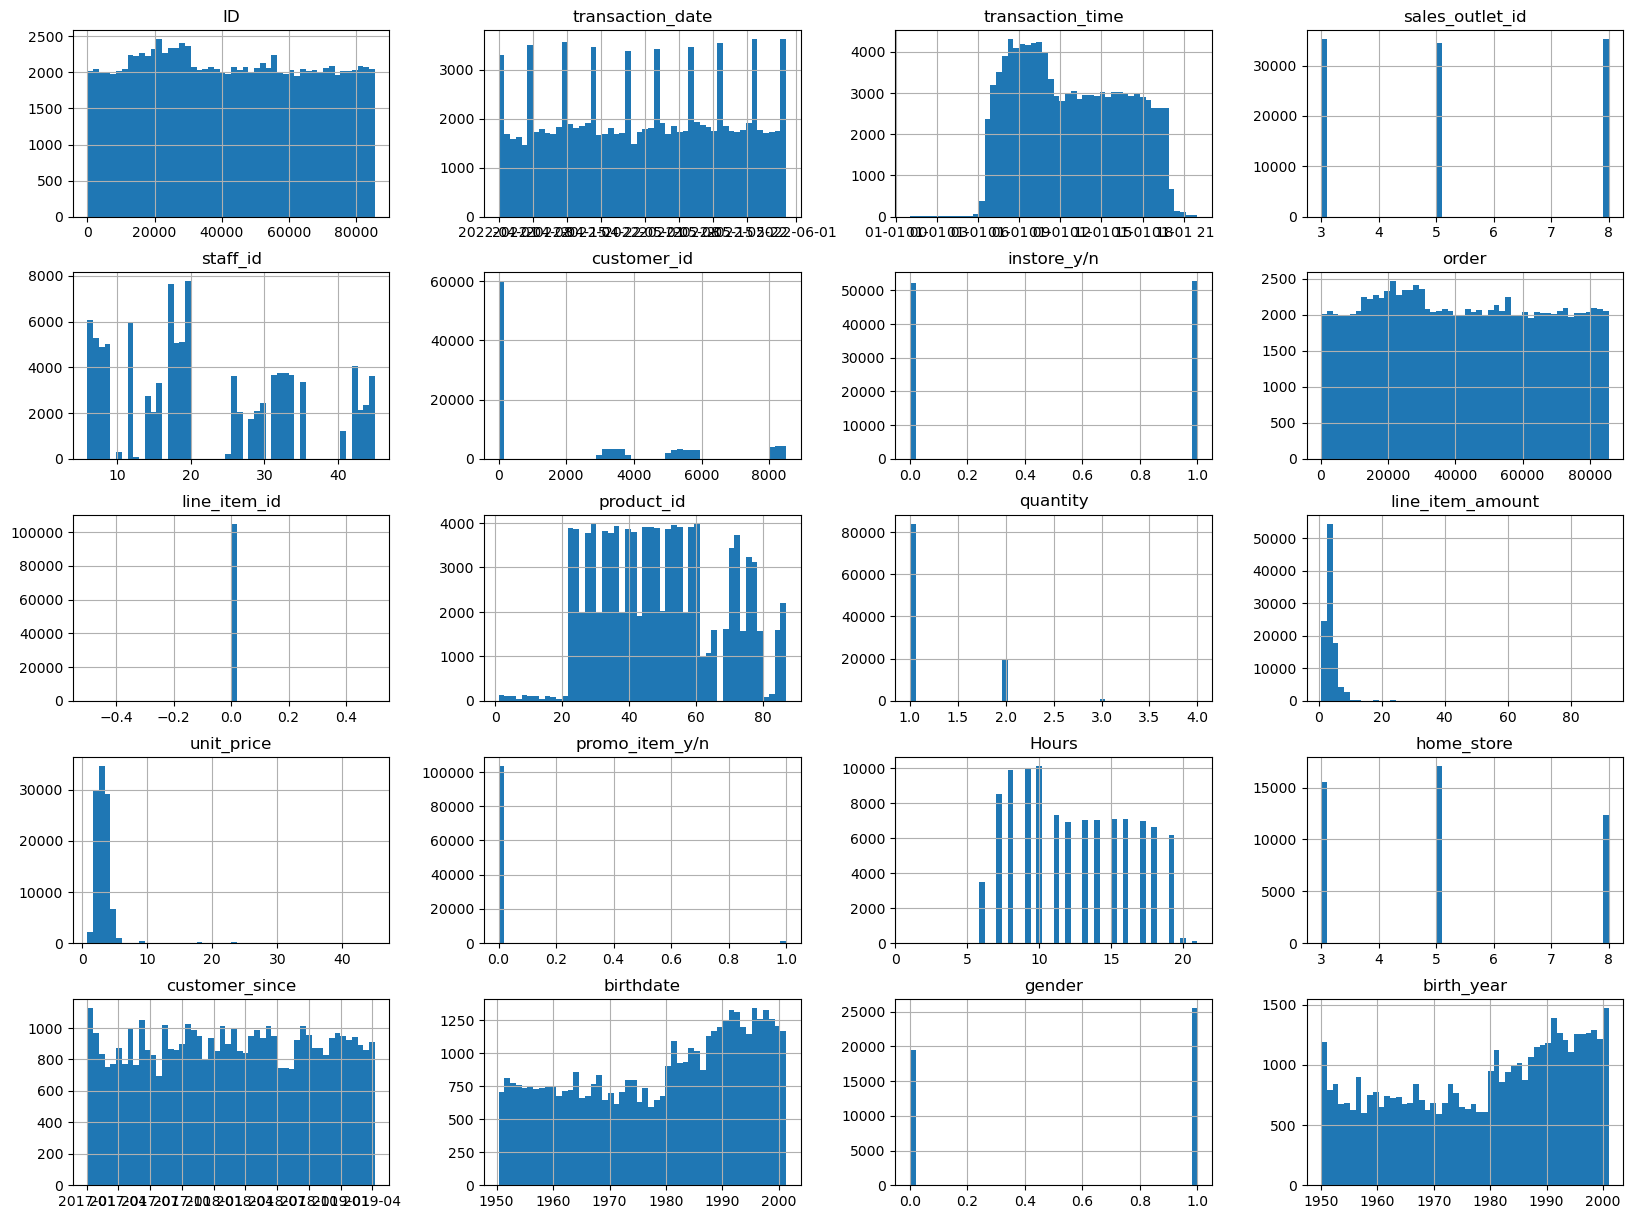

In [83]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

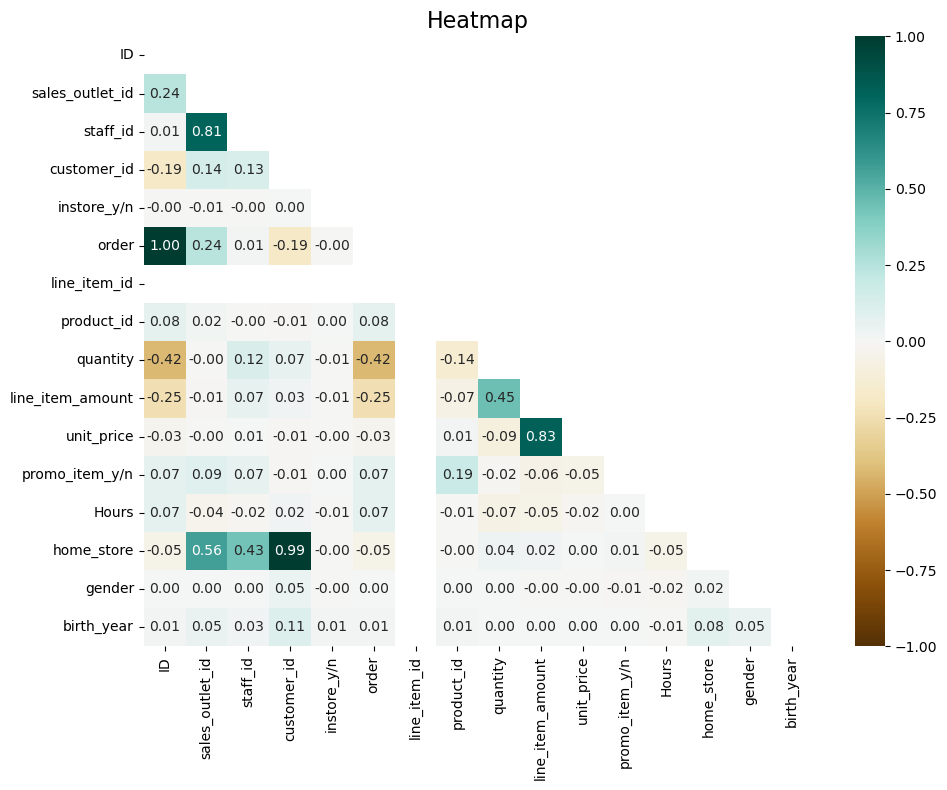

In [84]:
correlation_matrix = transactions_df.corr()

# Create masks for lower triangles
lower_triangle_mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix.where(lower_triangle_mask), cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

### Checking transactions per day of the week

In [85]:
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

# Extract the day of the week and create a new column 'day_of_week'
transactions_df['day_of_week'] = transactions_df['transaction_date'].dt.day_name()

# Display the DataFrame with the 'day_of_week' column
print(transactions_df[['transaction_date', 'day_of_week']])

       transaction_date day_of_week
0            2022-04-27   Wednesday
1            2022-04-27   Wednesday
2            2022-04-27   Wednesday
3            2022-04-27   Wednesday
4            2022-04-27   Wednesday
...                 ...         ...
105003       2022-05-16      Monday
105004       2022-05-13      Friday
105005       2022-05-13      Friday
105006       2022-05-13      Friday
105007       2022-05-13      Friday

[105008 rows x 2 columns]


In [86]:
transactions_df['day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

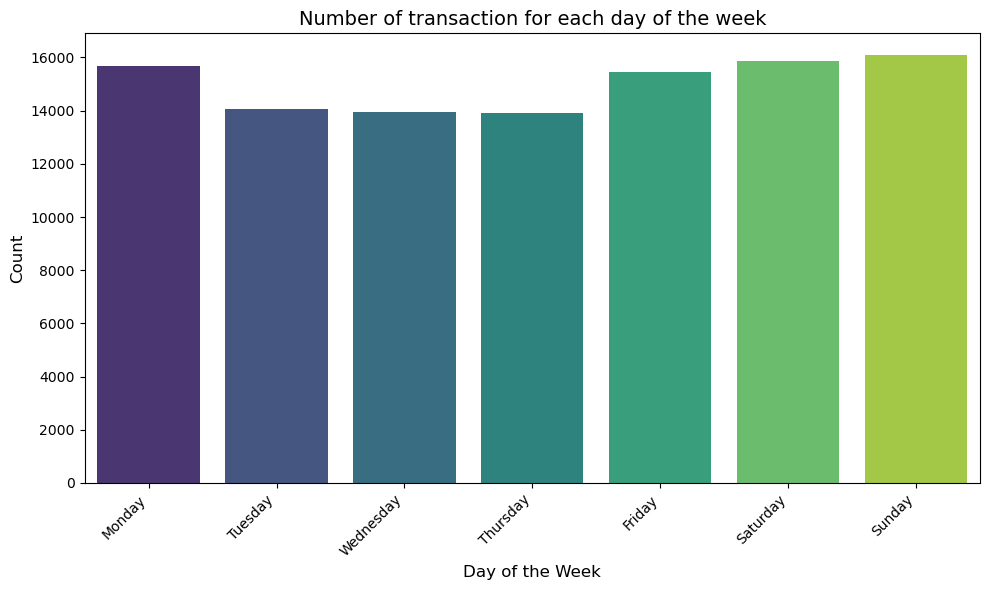

In [87]:
# Calculate the count of rows for each day of the week
day_counts = transactions_df['day_of_week'].value_counts().reset_index()
day_counts.columns = ['Day of the Week', 'Count']

# Sort days of the week in the correct order (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.sort_values(by='Day of the Week', key=lambda x: x.map({day: i for i, day in enumerate(days_order)}))

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_counts, x='Day of the Week', y='Count', palette='viridis')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of transaction for each day of the week', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Checking transactions per hour of the day

In [88]:
transactions_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
0   1       2022-04-27 1900-01-01 09:53:55                8        42   
1   1       2022-04-27 1900-01-01 09:53:55                8        42   
2   2       2022-04-27 1900-01-01 08:00:34                8        42   
3   3       2022-04-27 1900-01-01 09:04:58                8        42   
4   4       2022-04-27 1900-01-01 08:48:32                8        42   

   customer_id  instore_y/n  order  line_item_id  product_id  ...  \
0            0            0      1             0          38  ...   
1            0            0      1             0          84  ...   
2            0            0      2             0          51  ...   
3            0            1      3             0          33  ...   
4         8232            1      4             0          27  ...   

   line_item_amount  unit_price  promo_item_y/n  Hours  home_store  \
0               7.5        3.75               0      9         NaN   
1               0.8        0.80               0      9         NaN   
2               6.0        3.00               0      8         NaN   
3               3.5        3.50               0      9         NaN   
4               3.5        3.50               0      8         8.0   

   customer_since  birthdate gender  birth_year  day_of_week  
0             NaT        NaT    NaN         NaN    Wednesday  
1             NaT        NaT    NaN         NaN    Wednesday  
2             NaT        NaT    NaN         NaN    Wednesday  
3             NaT        NaT    NaN         NaN    Wednesday  
4      2018-01-24 1974-03-20    0.0      1974.0    Wednesday  

[5 rows x 21 columns]

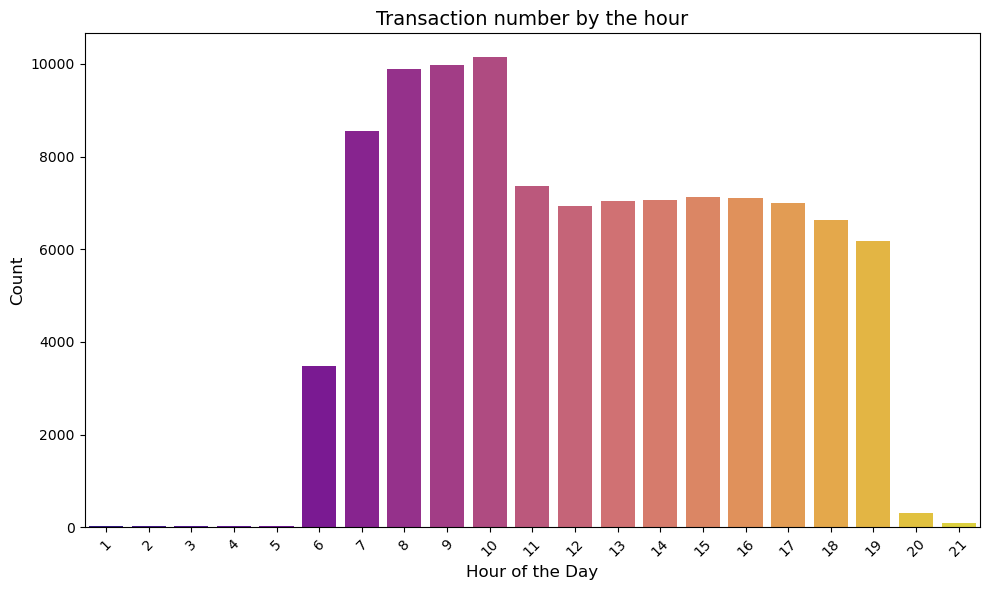

In [89]:
# Calculate the count of rows for each hour
hour_counts = transactions_df['Hours'].value_counts().reset_index()
hour_counts.columns = ['Hours', 'Count']

# Sort hours in chronological order
hour_counts = hour_counts.sort_values(by='Hours')

# Create bar plot for hours
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_counts, x='Hours', y='Count', palette='plasma')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Transaction number by the hour', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

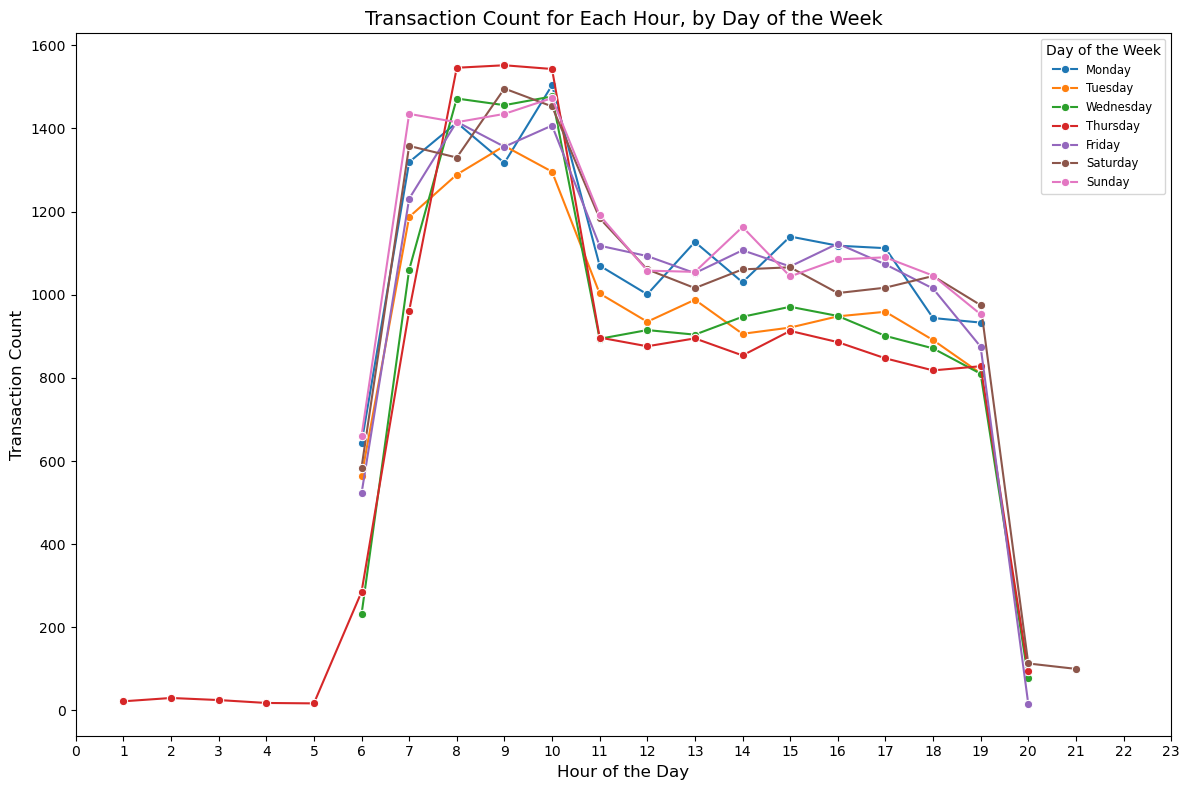

In [90]:
# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create line charts for each day of the week
plt.figure(figsize=(12, 8))

for day in days_order:
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', label=day, marker='o')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.title('Transaction Count for Each Hour, by Day of the Week', fontsize=14)
plt.legend(title='Day of the Week', fontsize='small')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

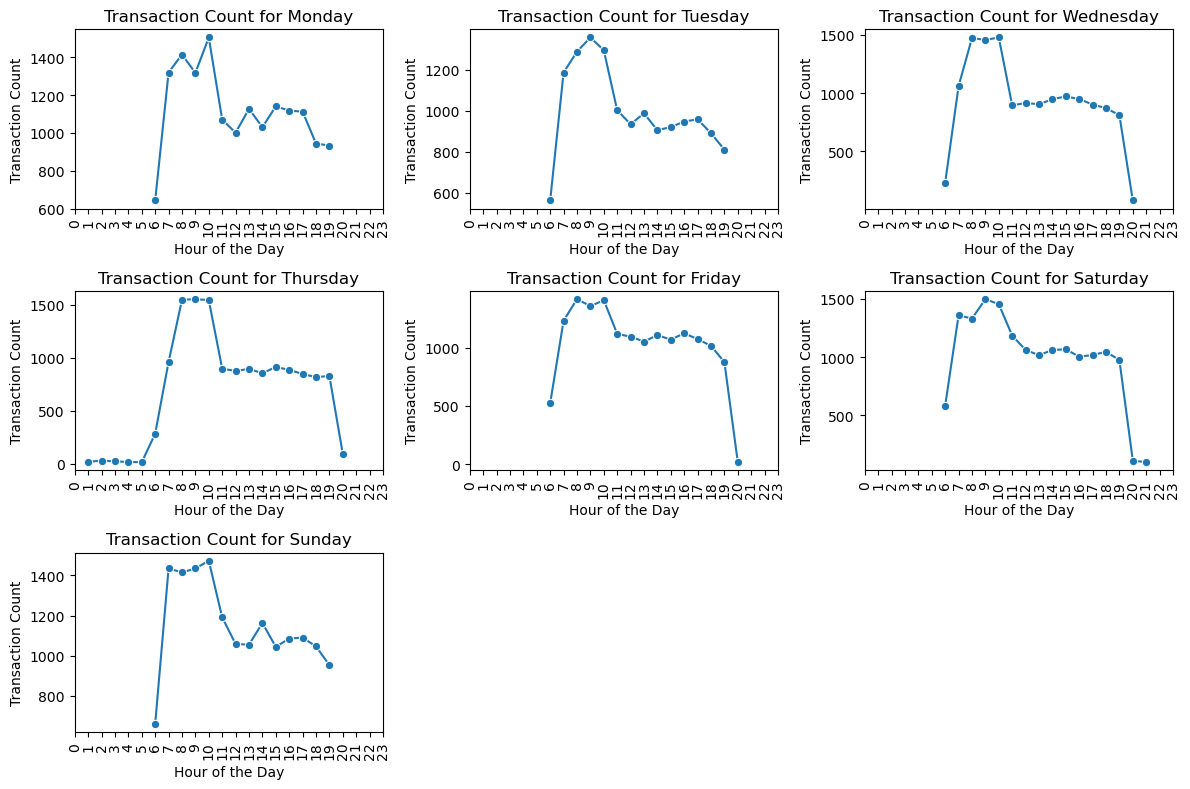

In [91]:
# Calculate counts for each day-hour combination
day_hour_counts = transactions_df.groupby(['day_of_week', 'Hours']).size().reset_index(name='Transaction Count')

# Set the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create individual line charts for each day of the week
plt.figure(figsize=(12, 8))

for i, day in enumerate(days_order, 1):
    plt.subplot(3, 3, i)
    day_data = day_hour_counts[day_hour_counts['day_of_week'] == day]
    sns.lineplot(data=day_data, x='Hours', y='Transaction Count', marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.title(f'Transaction Count for {day}')
    plt.xticks(rotation=90) 
    plt.xticks(range(24))

plt.tight_layout()
plt.show()

### Products

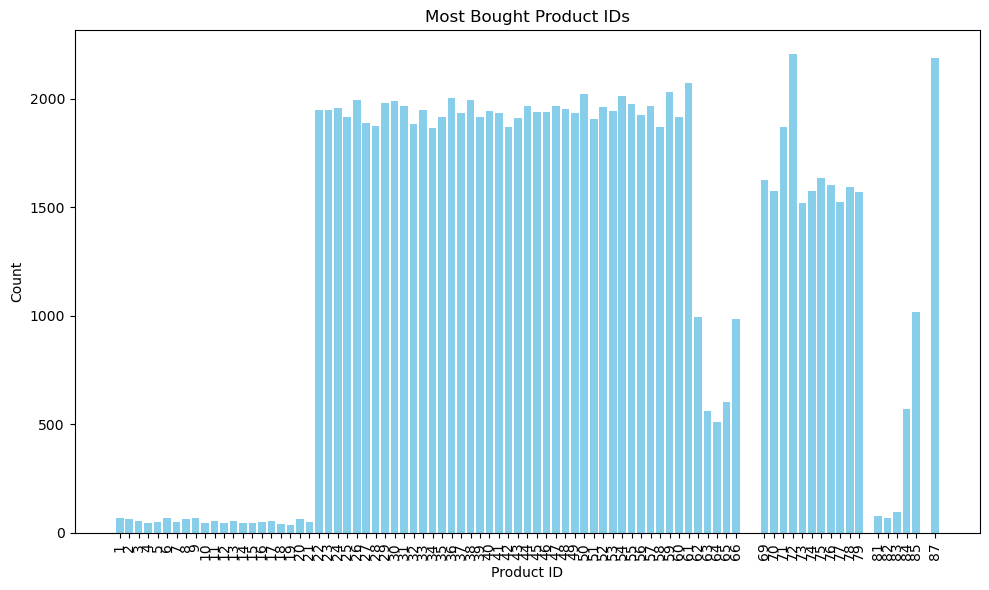

In [92]:
# Calculate counts for each product ID
product_counts = transactions_df['product_id'].value_counts().reset_index()
product_counts.columns = ['Product ID', 'Count']

# Sort product IDs by count in descending order
product_counts = product_counts.sort_values(by='Count', ascending=False)

# Create a bar plot for most bought product IDs
plt.figure(figsize=(10, 6))
plt.bar(product_counts['Product ID'], product_counts['Count'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Most Bought Product IDs')
plt.xticks(product_counts['Product ID'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Most popular product by the hour

In [94]:
# Group by 'Hours' and 'product_id', count occurrences, and reset index
hourly_product_counts = transactions_df.groupby(['Hours', 'product_id']).size().reset_index(name='count')

# Search for three most popular products for each hour
top3_products_by_hour = hourly_product_counts.groupby('Hours').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Display the result
print(top3_products_by_hour)

    Hours  product_id  count
0       1          29      2
1       1          32      2
2       1           9      1
3       2          52      3
4       2          24      2
..    ...         ...    ...
58     20          22      9
59     20          41      9
60     21          72      6
61     21          53      5
62     21          43      4

[63 rows x 3 columns]


In [95]:
transaction_counts = transactions_df['ID'].value_counts().reset_index()
transaction_counts.columns = ['Transaction ID', 'Count']

transaction_counts.head(25)

Transaction ID  Count
0            75967      9
1            66299      7
2            68155      7
3            67287      7
4            77055      7
5            72322      7
6            82323      7
7            55472      7
8            45104      7
9            69100      7
10           43520      7
11           40568      6
12           40613      6
13           49813      6
14           68583      6
15           40384      6
16           68758      6
17           64521      6
18           79061      6
19           66111      6
20           79481      6
21           58797      6
22           69287      6
23           47559      6
24           58894      6

In [98]:
tra = Receipts[Receipts['ID'] == 75967]

# Display the rows where ID is 75967
print(tra)

          ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
93435  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93436  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93437  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93438  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93439  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93440  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93441  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93442  75967       2022-05-23 1900-01-01 08:12:22                8        33   
93443  75967       2022-05-23 1900-01-01 08:12:22                8        33   

       customer_id  instore_y/n  order  line_item_id  product_id  quantity  \
93435            0            1  75967             0          34         1   
93436            0            1  75967     

#### How many products were bought in one transaction

In [99]:
# Group by 'ID' and count unique product IDs for each 'ID'
product_count_per_id = transactions_df.groupby('ID')['product_id'].nunique().reset_index()
product_count_per_id.columns = ['ID', 'Unique_Product_Count']

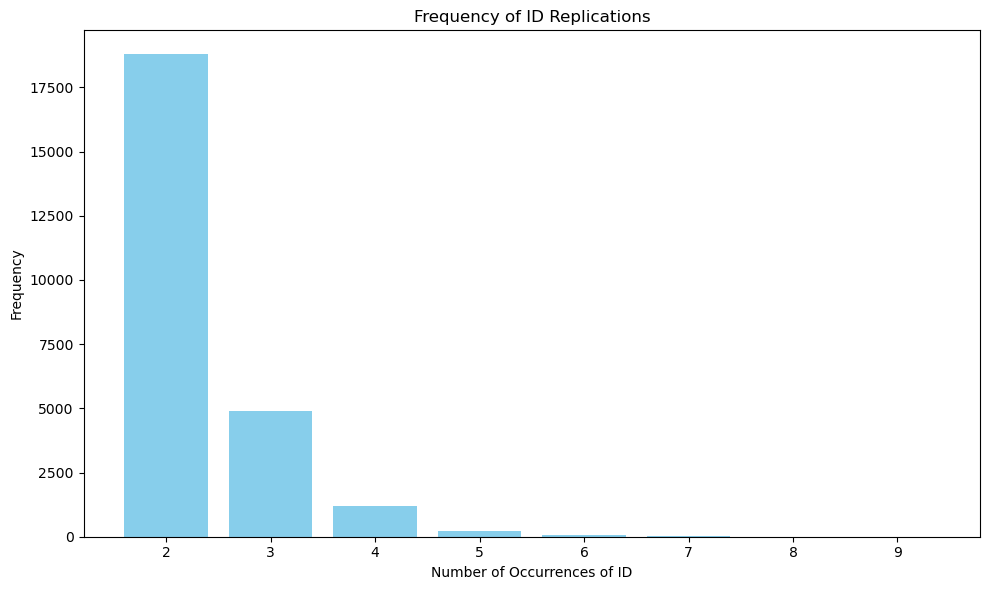

In [100]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 1]

# Create a bar plot to show count distribution of replications
plt.figure(figsize=(10, 6))
plt.bar(replication_counts['Occurrences'], replication_counts['Frequency'], color='skyblue')
plt.xlabel('Number of Occurrences of ID')
plt.ylabel('Frequency')
plt.title('Frequency of ID Replications')
plt.tight_layout()
plt.show()

In [101]:
import plotly.express as px

# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Count occurrences of each count value
count_distribution = id_counts['Count'].value_counts().reset_index()
count_distribution.columns = ['Occurrences', 'Frequency']

# Filter for occurrences greater than 1 (indicating replication)
replication_counts = count_distribution[count_distribution['Occurrences'] > 1]

# Create an interactive bar plot with plotly
fig = px.bar(replication_counts, x='Occurrences', y='Frequency',
             labels={'Occurrences': 'Number of Items bought together', 'Frequency': 'Frequency'},
             title='Frequency of Number of items bought at one transaction',
            # template='plotly_dark'
            )

# Show the plot
fig.show()

In [102]:
# Count occurrences of each 'ID'
id_counts = transactions_df['ID'].value_counts().reset_index()
id_counts.columns = ['ID', 'Count']

# Filter 'ID's that appear more than 10 times
high_frequency_ids = id_counts[id_counts['Count'] > 10]
print(high_frequency_ids)

Empty DataFrame
Columns: [ID, Count]
Index: []


# 3. Customer analysis

In [104]:
from datetime import datetime
# Calculate age
current_year = datetime.now().year
transactions_df['age'] = current_year - transactions_df['birthdate'].dt.year

# Create age groups
bins = [0, 18, 29, 39, 49, 59, 100] 
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']
transactions_df['age_group'] = pd.cut(transactions_df['age'], bins=bins, labels=labels, right=False)

In [105]:
# Group by age group and gender, and count the number of orders in each group
segmented_df = transactions_df.groupby(['age_group', 'gender'])['order'].count().reset_index(name='order_count')

# Display the result
print(segmented_df)

   age_group  gender  order_count
0       0-18     0.0            0
1       0-18     1.0            0
2      19-29     0.0         2729
3      19-29     1.0         3767
4      30-39     0.0         4713
5      30-39     1.0         6950
6      40-49     0.0         3503
7      40-49     1.0         4916
8      50-59     0.0         3077
9      50-59     1.0         3999
10       60+     0.0         5456
11       60+     1.0         5899


In [106]:
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and sum the quantity of items in each group
items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].sum().reset_index(name='item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(items_by_group, x='item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(items_by_group['age_group'].unique())},
             labels={'item_count': 'Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Item Count by Age Group and Gender')

# Show the plot
fig.show()

In [107]:
df_items = transactions_df.copy()

# Convert numeric gender values to strings
df_items['gender'] = df_items['gender'].map({0: 'Male', 1: 'Female', 2: 'Unknown'})

# Group by age group and gender, and calculate the average quantity of items in each group
avg_items_by_group = df_items.groupby(['age_group', 'gender'])['quantity'].mean().reset_index(name='avg_item_count')

# Create an interactive horizontal bar chart using Plotly Express
fig = px.bar(avg_items_by_group, x='avg_item_count', y='age_group', color='gender',
             orientation='h', barmode='group',
             color_discrete_map={'Female': 'lightcoral', 'Male': 'cornflowerblue'},
             category_orders={'age_group': sorted(avg_items_by_group['age_group'].unique())},
             labels={'avg_item_count': 'Average Item Count', 'age_group': 'Age Group'})

# Set chart title
fig.update_layout(title='Average Item Count by Age Group and Gender')

# Show the plot
fig.show()

### 3.1.Customer analysis based on genders - dropping all rows where gender is unknown

In [144]:
# Drop rows with NaN values
gender_df = transactions_df.copy()
gender_df = gender_df.dropna()
gender_df.head()

ID transaction_date    transaction_time  sales_outlet_id  staff_id  \
4    4       2022-04-27 1900-01-01 08:48:32                8        42   
5    5       2022-04-27 1900-01-01 09:21:40                8        45   
6    6       2022-04-27 1900-01-01 08:17:41                8        45   
7    7       2022-04-27 1900-01-01 08:50:42                8        42   
21  19       2022-04-27 1900-01-01 10:39:57                8        15   

    customer_id  instore_y/n  order  line_item_id  product_id  ...  \
4          8232            1      4             0          27  ...   
5          8223            1      5             0          24  ...   
6          8335            0      6             0          47  ...   
7          8100            0      7             0          57  ...   
21         8429            1     19             0          29  ...   

    promo_item_y/n  Hours  home_store  customer_since  birthdate  gender  \
4                0      8         8.0      2018-01-24 1974-03-20     0.0   
5                0      9         8.0      2017-03-27 1970-05-17     0.0   
6                0      8         8.0      2018-02-21 1966-01-10     0.0   
7                0      8         8.0      2019-01-26 1968-03-17     1.0   
21               0     10         8.0      2018-06-06 1992-09-02     0.0   

   birth_year day_of_week   age  age_group  
4      1974.0   Wednesday  50.0      50-59  
5      1970.0   Wednesday  54.0      50-59  
6      1966.0   Wednesday  58.0      50-59  
7      1968.0   Wednesday  56.0      50-59  
21     1992.0   Wednesday  32.0      30-39  

[5 rows x 23 columns]

In [145]:
gender_df['gender'].unique()

array([0., 1.])

In [146]:
columns_to_drop = ['Hours', 'day_of_week', 'sales_outlet_id', 'staff_id', 'home_store', 'birthdate','line_item_id', 'line_item_amount', 'unit_price']

gender_df = gender_df.drop(columns=columns_to_drop)

In [147]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45009 entries, 4 to 105003
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                45009 non-null  int64         
 1   transaction_date  45009 non-null  datetime64[ns]
 2   transaction_time  45009 non-null  datetime64[ns]
 3   customer_id       45009 non-null  int64         
 4   instore_y/n       45009 non-null  int64         
 5   order             45009 non-null  int64         
 6   product_id        45009 non-null  int64         
 7   quantity          45009 non-null  int64         
 8   promo_item_y/n    45009 non-null  int64         
 9   customer_since    45009 non-null  datetime64[ns]
 10  gender            45009 non-null  float64       
 11  birth_year        45009 non-null  float64       
 12  age               45009 non-null  float64       
 13  age_group         45009 non-null  category      
dtypes: category(1), datet

In [148]:
# Converting 'customer_since' column to datetime format in DataFrame
#gender_df['customer_since'] = pd.to_datetime(gender_df['customer_since'])

# Calculating age at the time of becoming a customer in the DataFrame
gender_df['age_at_first_purchase'] = gender_df['customer_since'].dt.year - gender_df['birth_year']
gender_df.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
4    4       2022-04-27 1900-01-01 08:48:32         8232            1      4   
5    5       2022-04-27 1900-01-01 09:21:40         8223            1      5   
6    6       2022-04-27 1900-01-01 08:17:41         8335            0      6   
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
21  19       2022-04-27 1900-01-01 10:39:57         8429            1     19   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
4           27         1               0     2018-01-24     0.0      1974.0   
5           24         1               0     2017-03-27     0.0      1970.0   
6           47         2               0     2018-02-21     0.0      1966.0   
7           57         1               0     2019-01-26     1.0      1968.0   
21          29         2               0     2018-06-06     0.0      1992.0   

     age age_group  age_at_first_purchase  
4   50.0     50-59                   44.0  
5   54.0     50-59                   47.0  
6   58.0     50-59                   52.0  
7   56.0     50-59                   51.0  
21  32.0     30-39                   26.0

In [149]:
# Binning ages into specified intervals and creating a new column
bins = [0, 19, 29, 39, 49, 59, float('inf')]
labels = ['0-18', '19-29', '30-39', '40-49', '50-59','60+']

gender_df['age_at_first_purchase_group'] = pd.cut(gender_df['age_at_first_purchase'], bins=bins, labels=labels)

# Displaying the updated DataFrame
gender_df.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
4    4       2022-04-27 1900-01-01 08:48:32         8232            1      4   
5    5       2022-04-27 1900-01-01 09:21:40         8223            1      5   
6    6       2022-04-27 1900-01-01 08:17:41         8335            0      6   
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
21  19       2022-04-27 1900-01-01 10:39:57         8429            1     19   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
4           27         1               0     2018-01-24     0.0      1974.0   
5           24         1               0     2017-03-27     0.0      1970.0   
6           47         2               0     2018-02-21     0.0      1966.0   
7           57         1               0     2019-01-26     1.0      1968.0   
21          29         2               0     2018-06-06     0.0      1992.0   

     age age_group  age_at_first_purchase age_at_first_purchase_group  
4   50.0     50-59                   44.0                       40-49  
5   54.0     50-59                   47.0                       40-49  
6   58.0     50-59                   52.0                       50-59  
7   56.0     50-59                   51.0                       50-59  
21  32.0     30-39                   26.0                       19-29

### Checking correlation between current age (group), age whe becoming first customer (goup) and gender

In [150]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Transform 'age_group' and 'age_at_first_purchase_group' columns
new_df = pd.DataFrame()
new_df['gender'] = gender_df['gender']
new_df['age_group_number'] = label_encoder.fit_transform(gender_df['age_group'].astype(str))
new_df['age_at_first_purchase_group_number'] = label_encoder.fit_transform(gender_df['age_at_first_purchase_group'].astype(str))
new_df.head()

gender  age_group_number  age_at_first_purchase_group_number
4      0.0                 3                                   3
5      0.0                 3                                   3
6      0.0                 3                                   4
7      1.0                 3                                   4
21     0.0                 1                                   1

In [151]:
new_df.corr()

gender  age_group_number  \
gender                              1.000000         -0.050785   
age_group_number                   -0.050785          1.000000   
age_at_first_purchase_group_number -0.050807          0.945881   

                                    age_at_first_purchase_group_number  
gender                                                       -0.050807  
age_group_number                                              0.945881  
age_at_first_purchase_group_number                            1.000000

C:\Users\ester\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



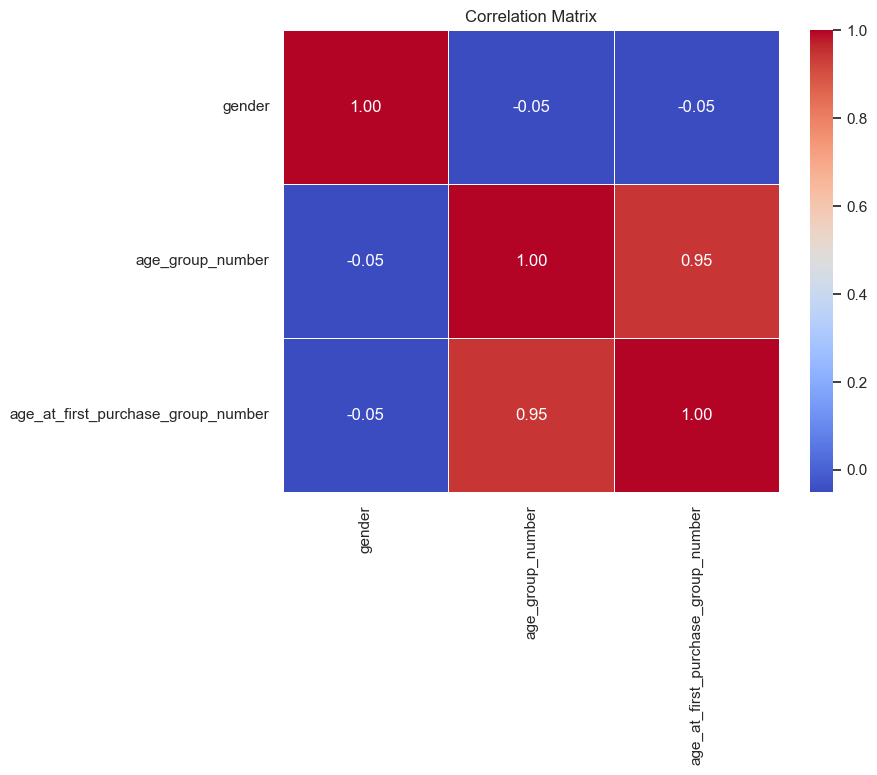

In [152]:
correlation_matrix = new_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\ester\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



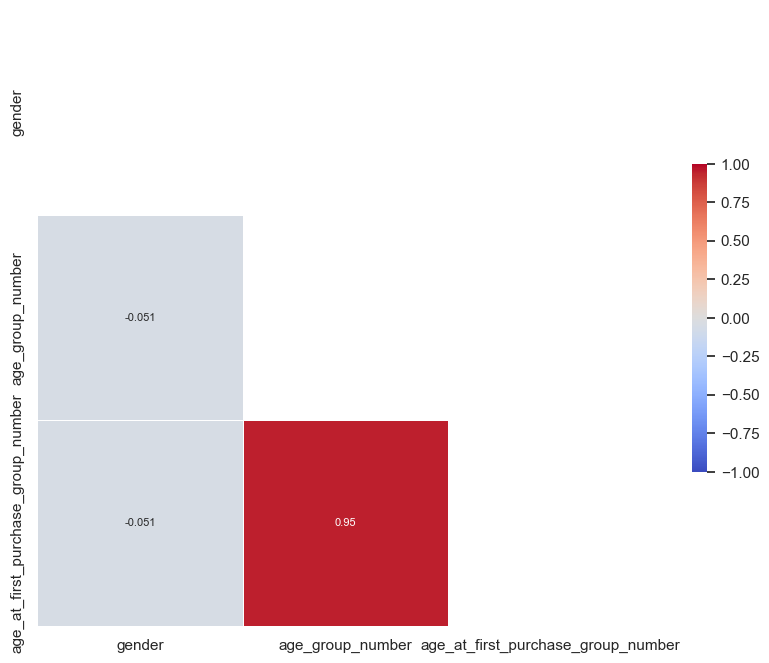

In [153]:
# plot heatmap
corrmat = new_df.corr()
# set mask for upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# set hot-cold colour scheme
cmap = 'coolwarm'

# plot graph
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square = True, mask=mask, cmap=cmap,
            vmax=1, vmin=-1, center=0,
            annot = True, annot_kws = {'size': 8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

C:\Users\ester\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packagin

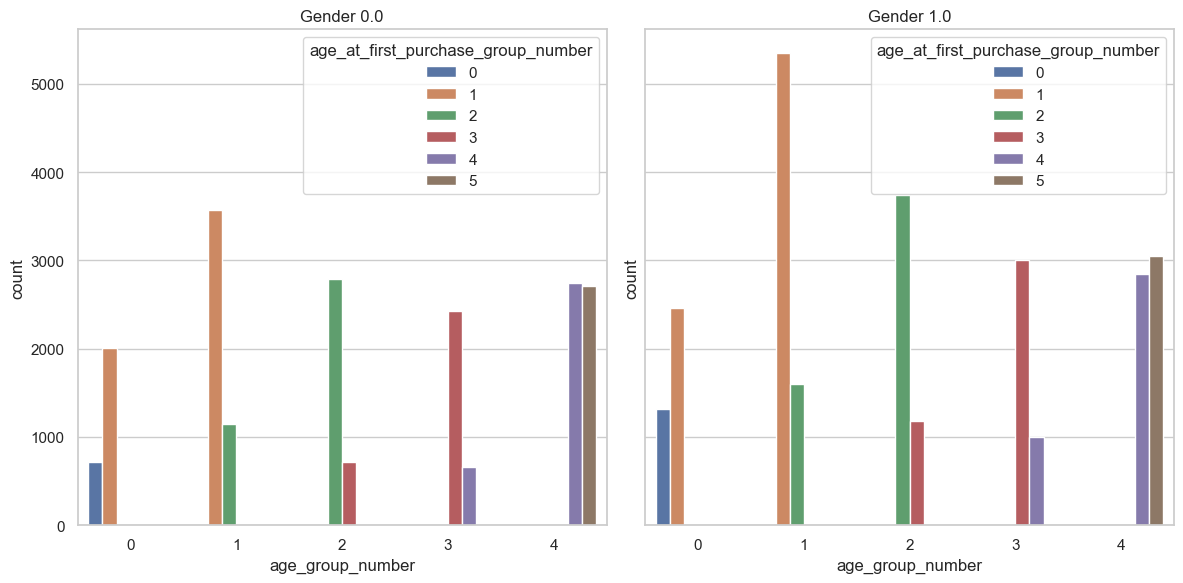

In [154]:
filtered_groups = new_df.dropna(subset=['gender'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for gender 0.0 - Male
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 0.0], ax=axes[0])
axes[0].set_title('Gender 0.0')

# Plot for gender 1.0 - Female
sns.countplot(x='age_group_number', hue='age_at_first_purchase_group_number', data=filtered_groups[filtered_groups['gender'] == 1.0], ax=axes[1])
axes[1].set_title('Gender 1.0')

# Layout
plt.tight_layout()

# Show the plots
plt.show()

### 3.2. Female

In [187]:
# Select rows where 'gender' column equals 1
Female = gender_df[gender_df['gender'] == 1]
Female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 7 to 104977
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           25531 non-null  int64         
 1   transaction_date             25531 non-null  datetime64[ns]
 2   transaction_time             25531 non-null  datetime64[ns]
 3   customer_id                  25531 non-null  int64         
 4   instore_y/n                  25531 non-null  int64         
 5   order                        25531 non-null  int64         
 6   product_id                   25531 non-null  int64         
 7   quantity                     25531 non-null  int64         
 8   promo_item_y/n               25531 non-null  int64         
 9   customer_since               25531 non-null  datetime64[ns]
 10  gender                       25531 non-null  float64       
 11  birth_year                   25531 non-n

In [188]:
Female.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
22  20       2022-04-27 1900-01-01 10:07:20         8178            1     20   
23  21       2022-04-27 1900-01-01 08:33:47         8055            0     21   
29  26       2022-04-27 1900-01-01 10:24:12         8363            0     26   
39  35       2022-04-27 1900-01-01 09:51:03         8445            1     35   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
7           57         1               0     2019-01-26     1.0      1968.0   
22          54         2               0     2017-01-09     1.0      1998.0   
23          43         1               0     2018-04-21     1.0      1985.0   
29          28         2               0     2019-03-30     1.0      1973.0   
39          42         2               0     2018-04-29     1.0      1992.0   

     age age_group  age_at_first_purchase age_at_first_purchase_group  
7   56.0     50-59                   51.0                       50-59  
22  26.0     19-29                   19.0                        0-18  
23  39.0     40-49                   33.0                       30-39  
29  51.0     50-59                   46.0                       40-49  
39  32.0     30-39                   26.0                       19-29

### How old were female customer when first order/signed in

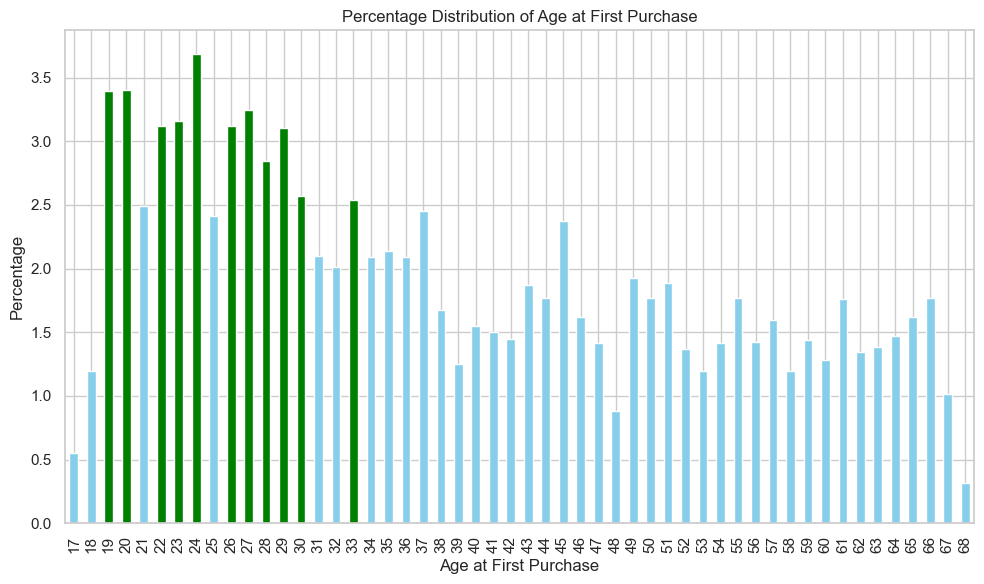

In [189]:
# Convert 'age_at_first_purchase' to integers
Female['age_at_first_purchase'] = Female['age_at_first_purchase'].astype(int)

# Calculate age percentages
age_percentage = Female['age_at_first_purchase'].value_counts(normalize=True).sort_index() * 100

# Plotting the sorted percentage distribution
plt.figure(figsize=(10, 6))

# Highlight bars with percentages greater than or equal to 2.5 in green
age_percentage.plot(kind='bar', color=['green' if percentage >= 2.5 else 'skyblue' for percentage in age_percentage])

plt.xlabel('Age at First Purchase')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Age at First Purchase')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [190]:
# Calculating counts for each age group
age_group_counts = Female['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts['count'].sum()
age_group_counts['percentage'] = round((age_group_counts['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts = age_group_counts.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts)

  age_group  count  percentage
5      0-18      0        0.00
4     19-29   3767       14.75
0     30-39   6950       27.22
2     40-49   4916       19.26
3     50-59   3999       15.66
1       60+   5899       23.11


In [191]:
# Convert interval data to string for visualization
age_group_counts['age_group'] = age_group_counts['age_group'].astype(str)

fig = px.bar(age_group_counts, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Female',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Checking how many items per transaction are for each age group

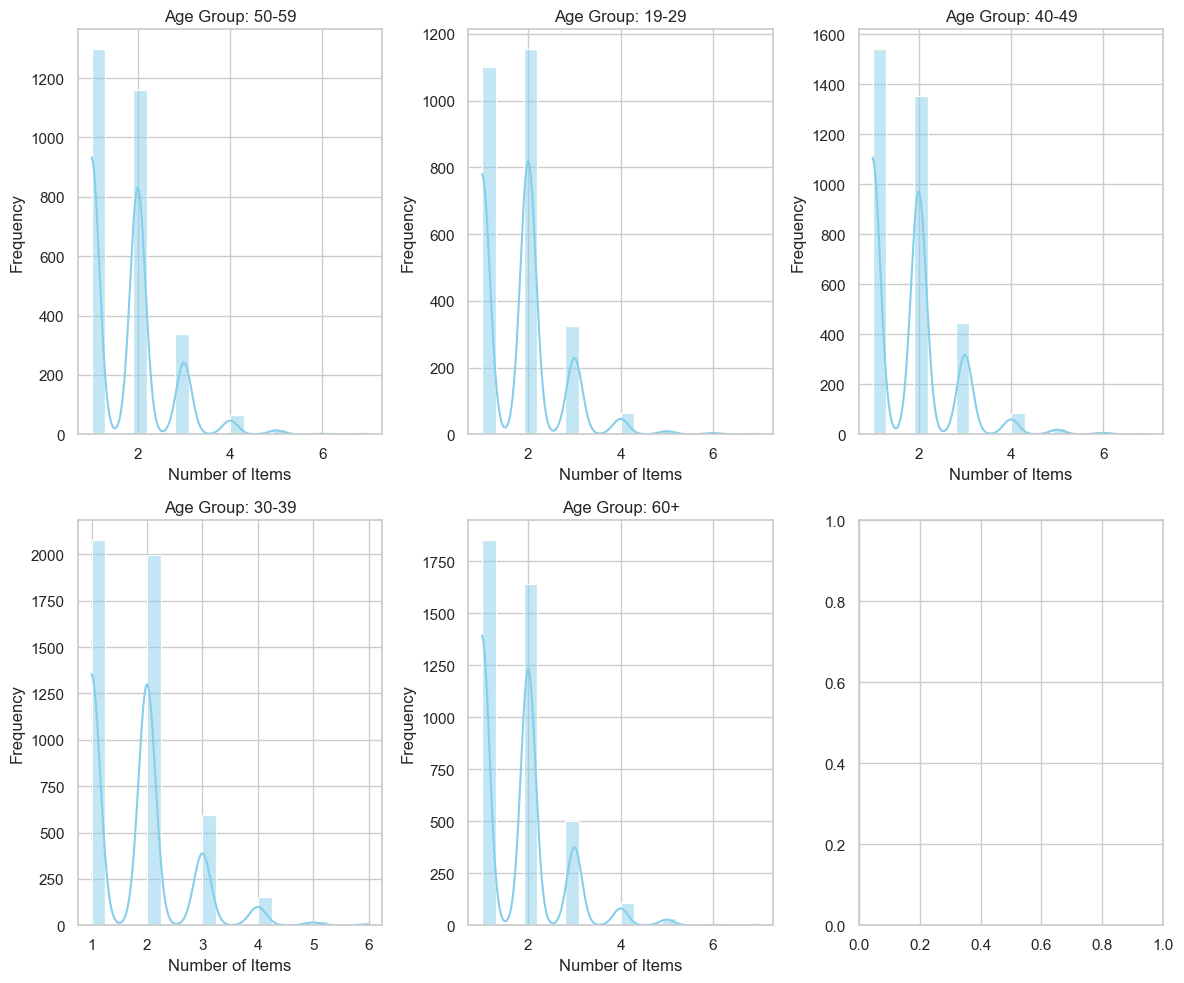

In [192]:
# Set the style of the plots
sns.set_style('whitegrid')

# Get unique age groups
age_groups = Female['age_group'].unique()

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram 
    sns.histplot(items_per_transaction, bins=20, kde=True, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group: {age_group}')
    axes[row, col].set_xlabel('Number of Items')
    axes[row, col].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [193]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique age groups and sort them
age_groups = sorted(Female['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Create histogram for each age group
    hist = go.Histogram(x=items_per_transaction, nbinsx=20, name=f"Age Group: {age_group}")
    
    # Add histogram to the subplot
    fig.add_trace(hist, row=i+1, col=1)

# Update layout and display plot
fig.update_layout(height=800, showlegend=False)
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [194]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique age groups and sort them
age_groups = sorted(Female['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data = Female[Female['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    # Create histogram for each age group
    hist = go.Histogram(x=items_per_transaction, nbinsx=20, name=f"Age Group: {age_group}")
    
    # Add histogram to the subplot
    fig.add_trace(hist, row=i+1, col=1)

    
    
# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per transaction by age group - Female")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups), col=1)


# Show the plot
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [195]:
age_groups = sorted(Female['age_group'].unique())

age_group_results = []

for age_group in age_groups:
    age_group_data = Female[Female['age_group'] == age_group]
    items_per_transaction = age_group_data.groupby('ID')['quantity'].sum()
    
    item_counts = items_per_transaction.value_counts(normalize=True).reset_index()
    item_counts.columns = ['items', 'percentage']
    item_counts['age_group'] = age_group
    
    age_group_results.append(item_counts)

# Combine results for all age groups into a single DataFrame
result_df = pd.concat(age_group_results, ignore_index=True)
result_df['percentage'] = (result_df['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
result_df.head()

items percentage age_group
0      2        43%     19-29
1      1        41%     19-29
2      3        12%     19-29
3      4         2%     19-29
4      5         0%     19-29

In [196]:
# Sorting age groups
age_groups = sorted(result_df['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group in enumerate(age_groups, 1):
    # Filter the data for the specific age group
    age_group_data = result_df[result_df['age_group'] == age_group]
    
    # Convert percentage to numeric
    age_group_data['percentage'] = age_group_data['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data['items'], y=age_group_data['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group - Female")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups), col=1)

# Show plot
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### 3.3. Basket analysis for each of age group - Female

In [244]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [213]:
Female['age_group'].unique()

['50-59', '19-29', '40-49', '30-39', '60+']
Categories (6, object): ['0-18' < '19-29' < '30-39' < '40-49' < '50-59' < '60+']

In [214]:
Female_groups = Female.copy()

In [215]:
Female_groups['age_group_number'] = label_encoder.fit_transform(Female_groups['age_group'].astype(str))
Female_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 7 to 104977
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           25531 non-null  int64         
 1   transaction_date             25531 non-null  datetime64[ns]
 2   transaction_time             25531 non-null  datetime64[ns]
 3   customer_id                  25531 non-null  int64         
 4   instore_y/n                  25531 non-null  int64         
 5   order                        25531 non-null  int64         
 6   product_id                   25531 non-null  int64         
 7   quantity                     25531 non-null  int64         
 8   promo_item_y/n               25531 non-null  int64         
 9   customer_since               25531 non-null  datetime64[ns]
 10  gender                       25531 non-null  float64       
 11  birth_year                   25531 non-n

In [216]:
Female_groups['age_group_number'] = Female_groups['age_group'].cat.codes

# Print the unique numerical codes assigned to each category
print(Female_groups['age_group_number'].unique())

[4 1 3 2 5]


In [217]:
Female_groups.head()

ID transaction_date    transaction_time  customer_id  instore_y/n  order  \
7    7       2022-04-27 1900-01-01 08:50:42         8100            0      7   
22  20       2022-04-27 1900-01-01 10:07:20         8178            1     20   
23  21       2022-04-27 1900-01-01 08:33:47         8055            0     21   
29  26       2022-04-27 1900-01-01 10:24:12         8363            0     26   
39  35       2022-04-27 1900-01-01 09:51:03         8445            1     35   

    product_id  quantity  promo_item_y/n customer_since  gender  birth_year  \
7           57         1               0     2019-01-26     1.0      1968.0   
22          54         2               0     2017-01-09     1.0      1998.0   
23          43         1               0     2018-04-21     1.0      1985.0   
29          28         2               0     2019-03-30     1.0      1973.0   
39          42         2               0     2018-04-29     1.0      1992.0   

     age age_group  age_at_first_purchase age_at_first_purchase_group  \
7   56.0     50-59                     51                       50-59   
22  26.0     19-29                     19                        0-18   
23  39.0     40-49                     33                       30-39   
29  51.0     50-59                     46                       40-49   
39  32.0     30-39                     26                       19-29   

    age_group_number  
7                  4  
22                 1  
23                 3  
29                 4  
39                 2

#### 0-18 - group is skipped doue to Ethical consideration

In [218]:
all_age_group_dfs = []

# Available age group numbers:  1, 2, 3, 4,5
for age_group_number in range(5):
    # Filter data for the current age group
    MBA_Female_age_group = Female_groups[Female_groups['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Female_age_group.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

    # Encode transactions for Eclat
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Eclat algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Create a dictionary to store results for the current age group
    age_group_dict = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': []}

    # Iterate over each product in df_encoded
    for product in df_encoded.columns:
        if product == 'nan': 
            continue
        
        # Find relevant products for the current product
        relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

        # Store the results in the dictionary
        for _, row in relevant_products.iterrows():
            other_product = list(row['itemsets'] - {product})[0]
            support_percentage = row['support'] * 100
            age_group_dict['Age_Group_Number'].append(age_group_number)
            age_group_dict['Product'].append(product)
            age_group_dict['Related Product'].append(other_product)
            age_group_dict['Support Percentage'].append(support_percentage)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df = pd.DataFrame(age_group_dict)

    # Append the DataFrame to the list
    all_age_group_dfs.append(age_group_df)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_F = pd.concat(all_age_group_dfs, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_F)

     Age_Group_Number  Product  Related Product  Support Percentage
0                 1.0     22.0             69.0            0.220751
1                 1.0     25.0             40.0            0.220751
2                 1.0     30.0             70.0            0.220751
3                 1.0     33.0             79.0            0.264901
4                 1.0     34.0             69.0            0.220751
..                ...      ...              ...                 ...
165               4.0     77.0             49.0            0.245801
166               4.0     78.0             47.0            0.204834
167               4.0     79.0             32.0            0.204834
168               4.0     79.0             47.0            0.245801
169               4.0     87.0             72.0            0.901270

[170 rows x 4 columns]


In [219]:
all_age_group_results_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Group_Number    170 non-null    float64
 1   Product             170 non-null    float64
 2   Related Product     170 non-null    float64
 3   Support Percentage  170 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB


#### Loading products information data

In [220]:
df3 = pd.read_csv("C:\\ESTERA\\CCT\\PROJECT\\Data sets\\Coffee shop sample data\\product.csv")
df3.head()

product_id    product_group product_category       product_type  \
0           1  Whole Bean/Teas     Coffee beans      Organic Beans   
1           2  Whole Bean/Teas     Coffee beans  House blend Beans   
2           3  Whole Bean/Teas     Coffee beans     Espresso Beans   
3           4  Whole Bean/Teas     Coffee beans     Espresso Beans   
4           5  Whole Bean/Teas     Coffee beans      Gourmet Beans   

               product_name  \
0       Brazilian - Organic   
1  Our Old Time Diner Blend   
2            Espresso Roast   
3      Primo Espresso Roast   
4    Columbian Medium Roast   

                                 product_description unit_of_measure  \
0     It's like Carnival in a cup. Clean and smooth.           12 oz   
1  Out packed blend of beans that is reminiscent ...           12 oz   
2          Our house blend for a good espresso shot.            1 lb   
3   Our primium single source of hand roasted beans.            1 lb   
4           A smooth cup of coffee any time of day.             1 lb   

   current_wholesale_price current_retail_price  tax_exempt_yn  promo_yn  \
0                    14.40              $18.00               1         0   
1                    14.40              $18.00               1         0   
2                    11.80              $14.75               1         0   
3                    16.36              $20.45               1         0   
4                    12.00              $15.00               1         0   

   new_product_yn  
0               0  
1               0  
2               0  
3               0  
4               0

In [221]:
columns_to_drop = ['product_group','product_type','product_description','unit_of_measure','current_wholesale_price','current_retail_price',
                  'tax_exempt_yn','promo_yn','new_product_yn']

df3 = df3.drop(columns=columns_to_drop)
df3.head()

product_id product_category              product_name
0           1     Coffee beans       Brazilian - Organic
1           2     Coffee beans  Our Old Time Diner Blend
2           3     Coffee beans            Espresso Roast
3           4     Coffee beans      Primo Espresso Roast
4           5     Coffee beans    Columbian Medium Roast

In [226]:
# Function to replace numeric values with corresponding text from df3
def replace_with_text(value):
    product_name = df3.loc[df3['product_id'] == value, 'product_name'].values
    if len(product_name) > 0:
        return product_name[0]
    else:
        return value

# Create a new DataFrame with replaced values
recomendation_df_F = all_age_group_results_F.copy()
recomendation_df_F['Product'] = recomendation_df_F['Product'].apply(replace_with_text)
recomendation_df_F['Related Product'] = recomendation_df_F['Related Product'].apply(replace_with_text)

In [227]:
recomendation_df_F.head(25)

Age_Group_Number                      Product  \
0                1.0  Our Old Time Diner Blend Sm   
1                1.0                 Brazilian Sm   
2                1.0    Columbian Medium Roast Lg   
3                1.0                  Ethiopia Lg   
4                1.0     Jamaican Coffee River Sm   
5                1.0     Jamaican Coffee River Sm   
6                1.0     Jamaican Coffee River Lg   
7                1.0     Jamaican Coffee River Lg   
8                1.0     Jamaican Coffee River Lg   
9                1.0                        Latte   
10               1.0                   Cappuccino   
11               1.0                   Cappuccino   
12               1.0                   Cappuccino   
13               1.0                Cappuccino Lg   
14               1.0                Cappuccino Lg   
15               1.0                Cappuccino Lg   
16               1.0                Cappuccino Lg   
17               1.0                Peppermint Lg   
18               1.0         English Breakfast Rg   
19               1.0         English Breakfast Rg   
20               1.0         English Breakfast Rg   
21               1.0         English Breakfast Lg   
22               1.0         English Breakfast Lg   
23               1.0                 Earl Grey Rg   
24               1.0                 Earl Grey Lg   

                 Related Product  Support Percentage  
0              Hazelnut Biscotti            0.220751  
1                     Cappuccino            0.220751  
2                Cranberry Scone            0.220751  
3             Jumbo Savory Scone            0.264901  
4              Hazelnut Biscotti            0.220751  
5                  Oatmeal Scone            0.264901  
6   Sustainably Grown Organic Rg            0.220751  
7        Chocolate Chip Biscotti            0.264901  
8                  Oatmeal Scone            0.220751  
9                Chocolate syrup            0.264901  
10                  Brazilian Sm            0.220751  
11      Sugar Free Vanilla syrup            0.264901  
12               Chocolate syrup            0.309051  
13                Hazelnut syrup            0.220751  
14              Almond Croissant            0.220751  
15            Jumbo Savory Scone            0.220751  
16               Chocolate syrup            0.353201  
17           Chocolate Croissant            0.220751  
18      Spicy Eye Opener Chai Lg            0.220751  
19             Dark chocolate Rg            0.220751  
20               Cranberry Scone            0.220751  
21             Dark chocolate Rg            0.309051  
22            Jumbo Savory Scone            0.220751  
23           Chocolate Croissant            0.264901  
24             Hazelnut Biscotti            0.309051

# Male

In [228]:
# Select rows where 'gender' column equals 0
Male = gender_df[gender_df['gender'] == 0]
Male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19478 entries, 4 to 105003
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           19478 non-null  int64         
 1   transaction_date             19478 non-null  datetime64[ns]
 2   transaction_time             19478 non-null  datetime64[ns]
 3   customer_id                  19478 non-null  int64         
 4   instore_y/n                  19478 non-null  int64         
 5   order                        19478 non-null  int64         
 6   product_id                   19478 non-null  int64         
 7   quantity                     19478 non-null  int64         
 8   promo_item_y/n               19478 non-null  int64         
 9   customer_since               19478 non-null  datetime64[ns]
 10  gender                       19478 non-null  float64       
 11  birth_year                   19478 non-n

In [229]:
# Calculating counts for each age group
age_group_counts_M = Male['age_group'].value_counts().reset_index()
age_group_counts_M.columns = ['age_group', 'count']

# Adding a percentage column and rounding to 2 decimal places
total_count = age_group_counts_M['count'].sum()
age_group_counts_M['percentage'] = round((age_group_counts_M['count'] / total_count) * 100, 2)

# Sorting the DataFrame by age_group column
age_group_counts_M = age_group_counts_M.sort_values(by='age_group')

# Displaying the resulting DataFrame
print(age_group_counts_M)

  age_group  count  percentage
5      0-18      0        0.00
4     19-29   2729       14.01
1     30-39   4713       24.20
2     40-49   3503       17.98
3     50-59   3077       15.80
0       60+   5456       28.01


In [230]:
# Convert interval data to string for visualization
age_group_counts_M['age_group'] = age_group_counts_M['age_group'].astype(str)

fig = px.bar(age_group_counts_M, x='age_group', y='percentage', text='percentage',
             labels={'percentage': 'Percentage'},
             title='Percentage Distribution of Age Groups - Male',
             color='percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(xaxis_title='Age Group',
                  yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(transition_duration=500)

fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### How many items are per transaction for each age group - Male

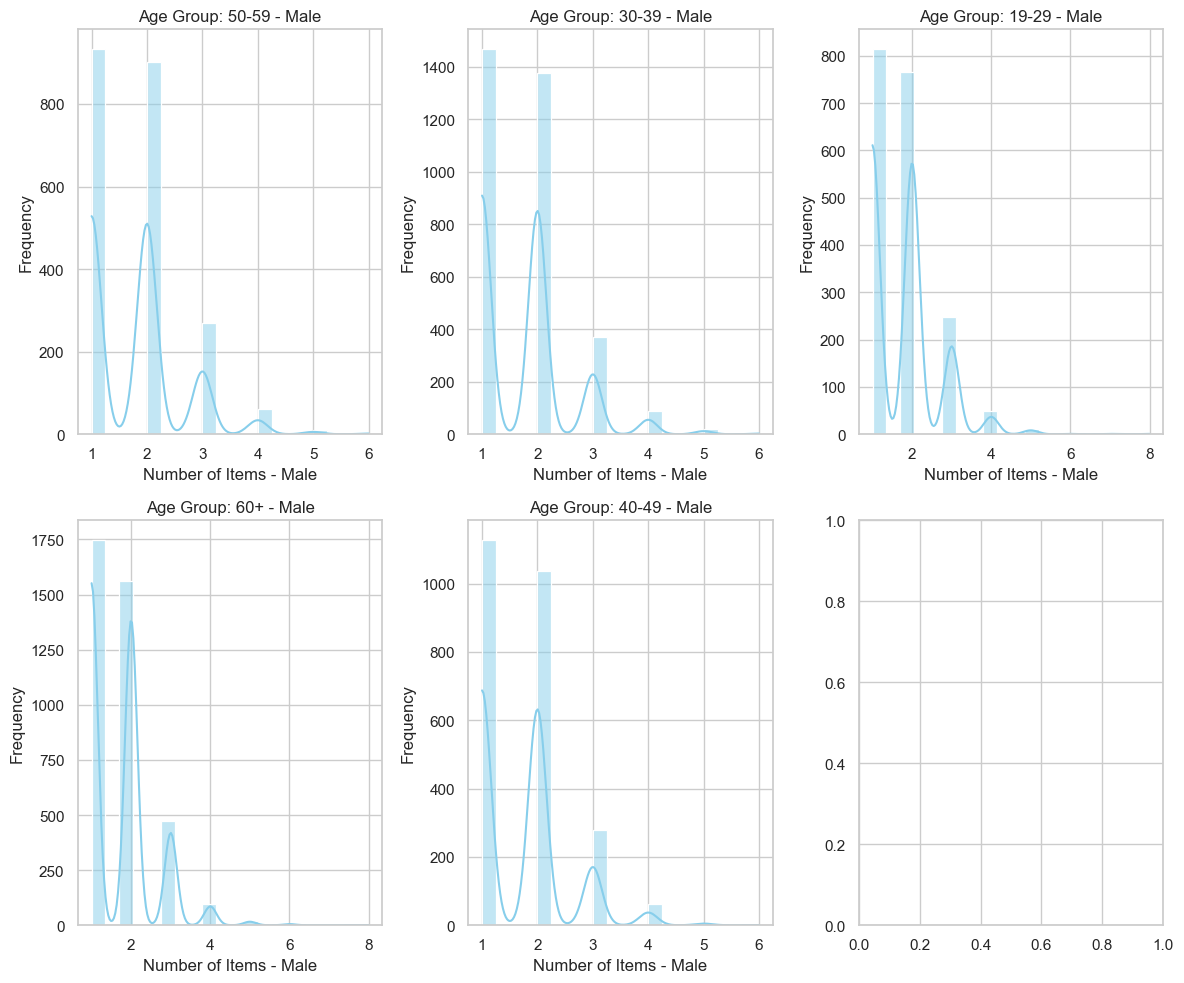

In [231]:
# Set the style of the plots
sns.set_style('whitegrid')

# Get unique age groups
age_groups = Male['age_group'].unique()

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = (len(age_groups) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

for i, age_group in enumerate(age_groups):
    # Filter the data for the specific age group
    age_group_data_M = Male[Male['age_group'] == age_group]
    
    # Calculate items per transaction for the age group
    items_per_transaction_M = age_group_data_M.groupby('ID')['quantity'].sum()
    
    # Calculate subplot position
    row = i // n_cols
    col = i % n_cols
    
    # Plot the histogram 
    sns.histplot(items_per_transaction_M, bins=20, kde=True, color='skyblue', ax=axes[row, col])
    
    # Set plot title and labels
    axes[row, col].set_title(f'Age Group: {age_group} - Male')
    axes[row, col].set_xlabel('Number of Items - Male')
    axes[row, col].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [232]:
age_groups_M = sorted(Male['age_group'].unique())

age_group_results_M = []

for age_group_M in age_groups_M:
    age_group_data_M = Male[Male['age_group'] == age_group_M]
    items_per_transaction_M = age_group_data_M.groupby('ID')['quantity'].sum()
    
    item_counts_M = items_per_transaction_M.value_counts(normalize=True).reset_index()
    item_counts_M.columns = ['items', 'percentage']
    item_counts_M['age_group'] = age_group_M
    
    age_group_results_M.append(item_counts_M)

# Combine results for all age groups into a single DataFrame
result_df_M = pd.concat(age_group_results_M, ignore_index=True)
result_df_M['percentage'] = (result_df_M['percentage'] * 100).apply(lambda x: f'{x:.0f}%')

# Show the DataFrame with the results
print(result_df_M)

    items percentage age_group
0       1        43%     19-29
1       2        40%     19-29
2       3        13%     19-29
3       4         3%     19-29
4       5         1%     19-29
5       8         0%     19-29
6       6         0%     19-29
7       7         0%     19-29
8       1        44%     30-39
9       2        41%     30-39
10      3        11%     30-39
11      4         3%     30-39
12      5         1%     30-39
13      6         0%     30-39
14      1        45%     40-49
15      2        41%     40-49
16      3        11%     40-49
17      4         2%     40-49
18      5         0%     40-49
19      6         0%     40-49
20      1        43%     50-59
21      2        41%     50-59
22      3        12%     50-59
23      4         3%     50-59
24      5         0%     50-59
25      6         0%     50-59
26      1        45%       60+
27      2        40%       60+
28      3        12%       60+
29      4         2%       60+
30      5         0%       60+
31      

In [233]:
# Sorting age groups
age_group_M = sorted(result_df_M['age_group'].unique())

# Create subplots for each age group
fig = make_subplots(rows=len(age_groups_M), cols=1, subplot_titles=[f"Age Group: {age}" for age in age_groups])

for i, age_group_M in enumerate(age_groups_M, 1):
    # Filter the data for the specific age group
    age_group_data_M = result_df_M[result_df_M['age_group'] == age_group_M]
    
    # Convert percentage to numeric
    age_group_data_M['percentage'] = age_group_data_M['percentage'].str.rstrip('%').astype(float)
    
    # Create bar chart for each age group
    bar_chart = go.Bar(x=age_group_data_M['items'], y=age_group_data_M['percentage'], name=f"Age Group: {age_group}")
    
    # Add bar chart to the subplot
    fig.add_trace(bar_chart, row=i, col=1)
    

# Update layout
fig.update_layout(height=800, showlegend=False, title_text="Items per Transaction Percentage by Age Group - Male")

# Update axes
fig.update_xaxes(title_text="Items Count", row=len(age_groups_M), col=1)
fig.update_yaxes(title_text="Percentage", row=len(age_groups_M), col=1)

# Show plot
fig.show()

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ester\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [234]:
Male_groups = Male.copy()
Male_groups['age_group_number'] = label_encoder.fit_transform(Male_groups['age_group'].astype(str))
Male_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19478 entries, 4 to 105003
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           19478 non-null  int64         
 1   transaction_date             19478 non-null  datetime64[ns]
 2   transaction_time             19478 non-null  datetime64[ns]
 3   customer_id                  19478 non-null  int64         
 4   instore_y/n                  19478 non-null  int64         
 5   order                        19478 non-null  int64         
 6   product_id                   19478 non-null  int64         
 7   quantity                     19478 non-null  int64         
 8   promo_item_y/n               19478 non-null  int64         
 9   customer_since               19478 non-null  datetime64[ns]
 10  gender                       19478 non-null  float64       
 11  birth_year                   19478 non-n

In [236]:
Male_groups['age_group_number'] = Male_groups['age_group'].cat.codes

# Print the unique numerical codes assigned to each category
print(Male_groups['age_group_number'].unique())

[4 2 1 5 3]


### Loop for MBA for all age groups - Male

In [237]:
all_age_group_dfs_M = []

# Available age group numbers: 1, 2, 3, 4, 5
for age_group_number in range(5):
    # Filter data for the current age group
    MBA_Male_age_group = Male_groups[Male_groups['age_group_number'] == age_group_number]

    # Convert DataFrame to a list of lists (transaction format)
    transactions = MBA_Male_age_group.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

    # Encode transactions for Eclat
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply Eclat algorithm to find frequent itemsets
    min_support = 0.002
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Create a dictionary to store results for the current age group
    age_group_dict_M = {'Age_Group_Number': [], 'Product': [], 'Related Product': [], 'Support Percentage': []}

    # Iterate over each product in df_encoded
    for product in df_encoded.columns:
        if product == 'nan': 
            continue
        
        # Find relevant products for the current product
        relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

        # Store the results in the dictionary
        for _, row in relevant_products.iterrows():
            other_product = list(row['itemsets'] - {product})[0]
            support_percentage = row['support'] * 100
            age_group_dict_M['Age_Group_Number'].append(age_group_number)
            age_group_dict_M['Product'].append(product)
            age_group_dict_M['Related Product'].append(other_product)
            age_group_dict_M['Support Percentage'].append(support_percentage)

    # Convert the dictionary to a DataFrame for the current age group
    age_group_df_M = pd.DataFrame(age_group_dict_M)

    # Append the DataFrame to the list
    all_age_group_dfs_M.append(age_group_df_M)

# Concatenate all DataFrames into a single DataFrame
all_age_group_results_M = pd.concat(all_age_group_dfs_M, ignore_index=True)

# Display the consolidated results
print(all_age_group_results_M)

     Age_Group_Number  Product  Related Product  Support Percentage
0                 1.0     22.0             56.0            0.244948
1                 1.0     24.0             35.0            0.244948
2                 1.0     24.0             37.0            0.244948
3                 1.0     26.0             70.0            0.244948
4                 1.0     27.0             87.0            0.244948
..                ...      ...              ...                 ...
283               4.0     79.0             59.0            0.215517
284               4.0     84.0             37.0            0.269397
285               4.0     84.0             39.0            0.215517
286               4.0     84.0             41.0            0.215517
287               4.0     87.0             72.0            1.023707

[288 rows x 4 columns]


In [238]:
# Create a new DataFrame with replaced values
recomendation_df_M = all_age_group_results_M.copy()
recomendation_df_M['Product'] = recomendation_df_M['Product'].apply(replace_with_text)
recomendation_df_M['Related Product'] = recomendation_df_M['Related Product'].apply(replace_with_text)

In [239]:
recomendation_df_M.head()

Age_Group_Number                      Product           Related Product  \
0               1.0  Our Old Time Diner Blend Sm  Spicy Eye Opener Chai Rg   
1               1.0  Our Old Time Diner Blend Lg  Jamaican Coffee River Rg   
2               1.0  Our Old Time Diner Blend Lg             Espresso shot   
3               1.0                 Brazilian Rg           Cranberry Scone   
4               1.0                 Brazilian Lg      Ouro Brasileiro shot   

   Support Percentage  
0            0.244948  
1            0.244948  
2            0.244948  
3            0.244948  
4            0.244948

### 3.1 Customer segmentation in general - to create recomendations for person who doesnt want to specify gender

In [240]:
transactions_df['gender'].unique()

array([nan,  0.,  1.])

In [241]:
all_df = transactions_df[['transaction_date', 'customer_id', 'product_id']]

# Display the transformed DataFrame
print(all_df.head())

  transaction_date  customer_id  product_id
0       2022-04-27            0          38
1       2022-04-27            0          84
2       2022-04-27            0          51
3       2022-04-27            0          33
4       2022-04-27         8232          27


In [243]:
# Convert DataFrame to a list of lists (transaction format)
transactions = all_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.02  
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

Frequent Itemsets:
     support itemsets
0   0.034723     (22)
1   0.033731     (23)
2   0.032335     (24)
3   0.033217     (25)
4   0.033584     (26)
5   0.031380     (27)
6   0.031453     (28)
7   0.033143     (29)
8   0.032960     (30)
9   0.032776     (31)
10  0.031821     (32)
11  0.034430     (33)
12  0.031453     (34)
13  0.032078     (35)
14  0.032151     (36)
15  0.032335     (37)
16  0.034723     (38)
17  0.032188     (39)
18  0.032519     (40)
19  0.033474     (41)
20  0.032188     (42)
21  0.033217     (43)
22  0.031968     (44)
23  0.032776     (45)
24  0.033474     (46)
25  0.035017     (47)
26  0.033768     (48)
27  0.033474     (49)
28  0.032629     (50)
29  0.032666     (51)
30  0.033695     (52)
31  0.032592     (53)
32  0.034393     (54)
33  0.034503     (55)
34  0.033548     (56)
35  0.034209     (57)
36  0.031747     (58)
37  0.034209     (59)
38  0.032886     (60)
39  0.034650     (61)
40  0.027558     (69)
41  0.026052     (70)
42  0.031563     (71)
43  0.035128 

In [245]:
# Convert DataFrame to a list of lists (transaction format)
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.02
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the top 3 items often bought together
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(3)

# Display the results
print(f"Top 3 itemsets often bought together are:")
for index, row in top_itemsets.iterrows():
    items = list(row['itemsets'])
    support_percentage = row['support'] * 100
    print(f"Items {items} - {support_percentage:.1f}%")

Top 3 itemsets often bought together are:
Items [72] - 3.5%
Items [47] - 3.5%
Items [22] - 3.5%


In [246]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Display the results in the desired format
result_df = pd.DataFrame(columns=['Product 1', 'Product 2', 'Support'])

# Iterate over frequent itemsets
for _, row in frequent_itemsets.iterrows():
    items = list(row['itemsets'])
    if len(items) == 2:
        result_df = result_df.append({'Product 1': items[0], 'Product 2': items[1], 'Support': row['support']}, ignore_index=True)

# Display the results
print(result_df)

    Product 1  Product 2   Support
0        77.0       22.0  0.003050
1        70.0       23.0  0.003050
2        76.0       23.0  0.003013
3        72.0       24.0  0.003087
4        27.0       71.0  0.003123
5        29.0       69.0  0.003087
6        72.0       29.0  0.003344
7        75.0       29.0  0.003013
8        72.0       30.0  0.003087
9        72.0       31.0  0.003270
10       72.0       32.0  0.003050
11       33.0       69.0  0.003013
12       76.0       36.0  0.003013
13       37.0       71.0  0.003050
14       76.0       37.0  0.003087
15       38.0       71.0  0.003123
16       75.0       38.0  0.003050
17       38.0       78.0  0.003050
18       72.0       39.0  0.003050
19       41.0       74.0  0.003050
20       41.0       79.0  0.003234
21       42.0       79.0  0.003013
22       44.0       71.0  0.003234
23       46.0       78.0  0.003123
24       74.0       47.0  0.003050
25       75.0       47.0  0.003050
26       47.0       79.0  0.003197
27       48.0       

In [247]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003 
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan':
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Display the results
    print(f"Products related to {product}:")
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        print(f"{other_product} was bought with {product} {support_percentage:.2f}% times.")
    print()

Products related to 1:

Products related to 2:

Products related to 3:

Products related to 4:

Products related to 5:

Products related to 6:

Products related to 7:

Products related to 8:

Products related to 9:

Products related to 10:

Products related to 11:

Products related to 12:

Products related to 13:

Products related to 14:

Products related to 15:

Products related to 16:

Products related to 17:

Products related to 18:

Products related to 19:

Products related to 20:

Products related to 21:

Products related to 22:
77 was bought with 22 0.30% times.

Products related to 23:
70 was bought with 23 0.30% times.
76 was bought with 23 0.30% times.

Products related to 24:
72 was bought with 24 0.31% times.

Products related to 25:

Products related to 26:

Products related to 27:
71 was bought with 27 0.31% times.

Products related to 28:

Products related to 29:
69 was bought with 29 0.31% times.
72 was bought with 29 0.33% times.
75 was bought with 29 0.30% times.

Prod

In [248]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.003
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA_dict = {'Product': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA_dict['Product'].append(product)
        MBA_dict['Related Product'].append(other_product)
        MBA_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA_df = pd.DataFrame(MBA_dict)

# Display the new DataFrame
print(MBA_df)

    Product  Related Product  Support Percentage
0        22               77            0.304979
1        23               70            0.304979
2        23               76            0.301304
3        24               72            0.308653
4        27               71            0.312328
..      ...              ...                 ...
71       78               57            0.301304
72       79               41            0.323351
73       79               42            0.301304
74       79               47            0.319677
75       87               72            1.172148

[76 rows x 3 columns]


In [249]:
market_basket_df = all_df[['transaction_date', 'customer_id', 'product_id']]

# Convert DataFrame to a list of lists (transaction format)
transactions = market_basket_df.groupby(['transaction_date', 'customer_id'])['product_id'].apply(list).values.tolist()

# Encode transactions for Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Eclat algorithm to find frequent itemsets
min_support = 0.002
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Create a dictionary to store results
MBA2_dict = {'product_id': [], 'Related Product': [], 'Support Percentage': []}

# Iterate over each product in all_df
for product in df_encoded.columns:
    if product == 'nan': 
        continue
    
    # Find relevant products for the current product
    relevant_products = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: product in x and len(x) == 2)]

    # Store the results in the dictionary
    for _, row in relevant_products.iterrows():
        other_product = list(row['itemsets'] - {product})[0]
        support_percentage = row['support'] * 100
        MBA2_dict['product_id'].append(product)
        MBA2_dict['Related Product'].append(other_product)
        MBA2_dict['Support Percentage'].append(support_percentage)

# Convert the dictionary to a DataFrame
MBA2_df = pd.DataFrame(MBA2_dict)

# Display the new DataFrame
print(MBA2_df)

      product_id  Related Product  Support Percentage
0             22               23            0.260886
1             22               24            0.246188
2             22               25            0.242513
3             22               26            0.253537
4             22               27            0.268234
...          ...              ...                 ...
2681          87               75            0.249862
2682          87               76            0.268234
2683          87               77            0.257211
2684          87               78            0.246188
2685          87               79            0.275583

[2686 rows x 3 columns]


In [250]:
# Create a new DataFrame with replaced values
recomendation_df = MBA2_df.copy()
recomendation_df['product_id'] = recomendation_df['product_id'].apply(replace_with_text)
recomendation_df['Related Product'] = recomendation_df['Related Product'].apply(replace_with_text)

recomendation_df.head()

product_id              Related Product  \
0  Our Old Time Diner Blend Sm  Our Old Time Diner Blend Rg   
1  Our Old Time Diner Blend Sm  Our Old Time Diner Blend Lg   
2  Our Old Time Diner Blend Sm                 Brazilian Sm   
3  Our Old Time Diner Blend Sm                 Brazilian Rg   
4  Our Old Time Diner Blend Sm                 Brazilian Lg   

   Support Percentage  
0            0.260886  
1            0.246188  
2            0.242513  
3            0.253537  
4            0.268234

In [116]:
MBA2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2686 non-null   int64  
 1   Related Product     2686 non-null   int64  
 2   Support Percentage  2686 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 63.1 KB


In [121]:
recomendation_df['product_id'].unique()

array(['Our Old Time Diner Blend Sm', 'Our Old Time Diner Blend Rg',
       'Our Old Time Diner Blend Lg', 'Brazilian Sm', 'Brazilian Rg',
       'Brazilian Lg', 'Columbian Medium Roast Sm',
       'Columbian Medium Roast Rg', 'Columbian Medium Roast Lg',
       'Ethiopia Sm', 'Ethiopia Rg', 'Ethiopia Lg',
       'Jamaican Coffee River Sm', 'Jamaican Coffee River Rg',
       'Jamaican Coffee River Lg', 'Espresso shot', 'Latte', 'Latte Rg',
       'Cappuccino', 'Cappuccino Lg', 'Lemon Grass Rg', 'Lemon Grass Lg',
       'Peppermint Rg', 'Peppermint Lg', 'Serenity Green Tea Rg',
       'Serenity Green Tea Lg', 'English Breakfast Rg',
       'English Breakfast Lg', 'Earl Grey Rg', 'Earl Grey Lg',
       'Traditional Blend Chai Rg', 'Traditional Blend Chai Lg',
       'Morning Sunrise Chai Rg', 'Morning Sunrise Chai Lg',
       'Spicy Eye Opener Chai Rg', 'Spicy Eye Opener Chai Lg',
       'Dark chocolate Rg', 'Dark chocolate Lg',
       'Sustainably Grown Organic Rg', 'Sustainably Grown O

In [122]:
recomendation_df['Related Product'].unique()

array(['Our Old Time Diner Blend Rg', 'Our Old Time Diner Blend Lg',
       'Brazilian Sm', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Sm', 'Columbian Medium Roast Rg',
       'Columbian Medium Roast Lg', 'Ethiopia Sm', 'Ethiopia Rg',
       'Ethiopia Lg', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Rg', 'Jamaican Coffee River Lg',
       'Espresso shot', 'Latte', 'Latte Rg', 'Cappuccino',
       'Cappuccino Lg', 'Lemon Grass Rg', 'Lemon Grass Lg',
       'Peppermint Rg', 'Peppermint Lg', 'Serenity Green Tea Rg',
       'Serenity Green Tea Lg', 'English Breakfast Rg',
       'English Breakfast Lg', 'Earl Grey Rg', 'Earl Grey Lg',
       'Traditional Blend Chai Rg', 'Traditional Blend Chai Lg',
       'Morning Sunrise Chai Rg', 'Morning Sunrise Chai Lg',
       'Spicy Eye Opener Chai Rg', 'Spicy Eye Opener Chai Lg',
       'Dark chocolate Rg', 'Dark chocolate Lg',
       'Sustainably Grown Organic Rg', 'Sustainably Grown Organic Lg',
       'Hazelnut Bi